In [1]:
import numpy as np
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import math
import random

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000,784) # 将图片摊平，变成向量
x_test = x_test.reshape(10000,784) # 对测试集进行同样的处理

In [4]:
x_best=np.array([0.00000000e+00, 1.93915469e-02, 1.68525285e-02, 0.00000000e+00,
       3.49676919e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61172548e-03, 0.00000000e+00, 1.49916475e-02, 0.00000000e+00,
       1.32935687e-02, 0.00000000e+00, 3.66344573e-01, 5.99771829e-05,
       0.00000000e+00, 3.99694463e-03, 2.02473960e-01, 0.00000000e+00,
       0.00000000e+00, 2.97542257e-05, 0.00000000e+00, 0.00000000e+00,
       3.06733030e-03, 3.76205681e-03, 1.19846416e-02, 0.00000000e+00,
       3.65233509e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.57725719e-03,
       0.00000000e+00, 1.09627710e-01, 3.42945277e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.74810468e-02, 2.37707016e-03, 0.00000000e+00,
       3.95972895e-03, 9.67545701e-03, 9.77746303e-04, 0.00000000e+00,
       0.00000000e+00, 1.49497317e-09, 4.25049215e-03, 0.00000000e+00,
       5.22812534e-02, 3.09219786e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.28576947e-01, 0.00000000e+00, 2.45567754e-05,
       0.00000000e+00, 9.22521253e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.32451358e-04, 0.00000000e+00, 0.00000000e+00,
       9.47645935e-03, 7.17767683e-03, 2.83905720e-01, 9.30684572e-04,
       3.22158220e-03, 0.00000000e+00, 7.10351816e-06, 2.49743190e-02,
       1.95581329e-02, 0.00000000e+00, 4.71618941e-04, 2.27711006e-03,
       5.04624608e-04, 0.00000000e+00, 0.00000000e+00, 5.94740588e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.20473935e-03,
       1.58864847e-03, 1.80060310e-03, 2.83076933e-01, 1.00602110e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.09164501e-02,
       6.31541864e-02, 0.00000000e+00, 4.36657732e-03, 0.00000000e+00,
       1.70254858e-03, 0.00000000e+00, 2.96283132e-03, 0.00000000e+00,
       9.84179798e-03, 0.00000000e+00, 0.00000000e+00, 1.45982153e-02,
       0.00000000e+00, 0.00000000e+00, 1.62377645e-03, 1.78330359e-04,
       0.00000000e+00, 9.43008971e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.38284658e-05, 5.50623538e-04, 0.00000000e+00,
       6.79673358e-03, 0.00000000e+00, 0.00000000e+00, 2.59484190e-05,
       9.93400163e-01, 3.97289606e-03, 0.00000000e+00, 6.38134634e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.48225287e-03,
       0.00000000e+00, 0.00000000e+00, 1.82797151e-04, 0.00000000e+00,
       3.40647969e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.42753998e-02, 9.02423758e-02, 3.11020821e-06, 2.56362134e-01,
       3.44577166e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.89640959e-03, 8.35040044e-02, 0.00000000e+00,
       8.66552575e-02, 0.00000000e+00, 0.00000000e+00, 1.43691718e-02,
       1.16692826e-05, 0.00000000e+00, 5.93455705e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.32716450e-03,
       0.00000000e+00, 0.00000000e+00, 6.25727523e-05, 0.00000000e+00,
       1.65445693e-02, 1.32948104e-03, 0.00000000e+00, 0.00000000e+00,
       1.39315580e-04, 0.00000000e+00, 1.62740647e-03, 2.13255625e-02,
       6.37968586e-05, 3.35846366e-01, 0.00000000e+00, 6.94035356e-04,
       5.29717351e-02, 2.32212627e-01, 0.00000000e+00, 5.12903864e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.00287327e-04,
       2.37485396e-03, 0.00000000e+00, 2.55805803e-03, 3.40123509e-02,
       0.00000000e+00, 1.09574722e-03, 3.29411765e-01, 5.28555865e-01,
       6.23529412e-01, 5.91435856e-01, 2.35749926e-01, 1.45771074e-01,
       0.00000000e+00, 4.27703965e-02, 2.72580670e-03, 3.73559744e-03,
       4.49137341e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.51446337e-05, 2.37931088e-04,
       2.96338709e-03, 2.11322772e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.67242870e-02, 4.21075569e-06,
       4.55025482e-02, 0.00000000e+00, 6.24562048e-02, 8.12765174e-01,
       9.71125579e-01, 9.96078431e-01, 9.95926907e-01, 9.41823231e-01,
       7.85262155e-01, 7.71632633e-01, 7.61310325e-01, 7.00719952e-01,
       7.51113499e-01, 7.79654570e-01, 6.69539249e-01, 7.01336123e-01,
       6.66666667e-01, 2.04568785e-01, 0.00000000e+00, 0.00000000e+00,
       3.80863096e-04, 2.23580686e-02, 7.86738688e-04, 1.71550974e-04,
       0.00000000e+00, 5.93426623e-04, 0.00000000e+00, 6.44809994e-03,
       4.39554953e-05, 6.56369439e-03, 2.62943709e-01, 4.45498491e-01,
       1.56195007e-01, 4.46235554e-01, 6.02664774e-01, 8.90577588e-01,
       9.95707388e-01, 6.35143716e-01, 9.87825885e-01, 9.98756148e-01,
       9.69783436e-01, 6.30079990e-03, 8.82091343e-01, 9.96648403e-01,
       9.98970404e-01, 5.50888383e-01, 4.91762610e-04, 9.28492616e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.33286900e-02,
       1.12568782e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.52426447e-03, 3.69563932e-04,
       0.00000000e+00, 3.58818841e-04, 0.00000000e+00, 1.90130325e-03,
       2.62538731e-01, 5.49019608e-02, 2.67630048e-01, 2.62745098e-01,
       2.62745098e-01, 2.31584473e-01, 8.47303083e-02, 9.41814504e-01,
       5.50068573e-01, 1.57889254e-01, 5.90128454e-04, 2.83216341e-03,
       2.42506291e-01, 1.63779614e-01, 0.00000000e+00, 2.29754146e-01,
       7.71251919e-05, 0.00000000e+00, 4.72996370e-05, 0.00000000e+00,
       6.59633319e-03, 0.00000000e+00, 0.00000000e+00, 4.01748589e-05,
       0.00000000e+00, 4.79693396e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.45634697e-05, 6.41472071e-03, 2.57604930e-03,
       0.00000000e+00, 3.71426495e-02, 3.16005027e-01, 9.59381250e-01,
       8.19607843e-01, 6.31039572e-02, 0.00000000e+00, 3.21782019e-03,
       4.64438633e-02, 9.76239145e-05, 3.62949052e-02, 1.32602711e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.27416545e-04, 2.47218987e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.83532452e-03,
       3.06319901e-03, 7.81158711e-03, 1.67687618e-01, 2.66745487e-05,
       2.25652628e-04, 8.37697536e-02, 7.24023403e-01, 9.99467329e-01,
       3.06437326e-01, 0.00000000e+00, 1.04707736e-04, 0.00000000e+00,
       7.60999859e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.15687568e-04, 0.00000000e+00, 3.66475649e-01, 0.00000000e+00,
       0.00000000e+00, 2.88923446e-03, 3.03395672e-05, 8.15398219e-03,
       0.00000000e+00, 0.00000000e+00, 4.92358037e-05, 2.45942826e-01,
       3.26011101e-01, 9.75513117e-01, 3.40605494e-01, 2.71666703e-03,
       1.71614911e-04, 5.05835002e-01, 9.95692976e-01, 8.89731800e-01,
       1.88548479e-01, 1.78785845e-04, 6.77919592e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.53948828e-06, 5.45980727e-03,
       2.18918779e-02, 0.00000000e+00, 2.66596886e-01, 7.47781053e-03,
       1.46631098e-08, 7.83143425e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.07565677e-02, 1.91847758e-02,
       9.91662524e-01, 2.60900106e-01, 5.84264887e-04, 7.88001387e-01,
       2.31384917e-01, 7.24182101e-01, 9.97691148e-01, 1.65135741e-01,
       1.13231732e-05, 0.00000000e+00, 0.00000000e+00, 2.47972672e-02,
       3.96413918e-03, 0.00000000e+00, 5.00822125e-02, 8.86926427e-02,
       1.42417446e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.37579316e-03, 2.15911548e-01, 1.49346944e-04, 4.59096004e-04,
       0.00000000e+00, 5.17162962e-02, 3.86175833e-04, 0.00000000e+00,
       4.61716896e-01, 0.00000000e+00, 1.39781869e-01, 0.00000000e+00,
       4.49599290e-01, 8.03118833e-01, 7.34865547e-01, 3.18209214e-04,
       0.00000000e+00, 0.00000000e+00, 1.30967332e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.52615513e-05, 5.47446165e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.76230608e-03,
       0.00000000e+00, 0.00000000e+00, 3.50118310e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.56774687e-01,
       6.89956230e-01, 5.05178834e-01, 7.45297018e-05, 4.64518537e-03,
       8.10155150e-01, 7.87261465e-01, 1.85509273e-01, 7.86003012e-04,
       4.54134971e-02, 1.23362293e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.09178783e-02,
       3.26357132e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.74175846e-04, 1.00950064e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.19567268e-02,
       0.00000000e+00, 4.41505413e-02, 0.00000000e+00, 4.77404429e-01,
       9.95313696e-01, 7.14518627e-01, 0.00000000e+00, 0.00000000e+00,
       1.06494432e-04, 2.50240477e-02, 1.00554559e-03, 0.00000000e+00,
       0.00000000e+00, 9.45456911e-02, 0.00000000e+00, 0.00000000e+00,
       2.36071431e-02, 5.68503132e-02, 6.52328930e-04, 3.34558206e-01,
       2.10247702e-02, 8.24734770e-02, 0.00000000e+00, 1.88936292e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.82077963e-05, 0.00000000e+00, 2.93504670e-01, 9.84658441e-01,
       9.27544796e-01, 2.34399780e-01, 1.63266230e-01, 0.00000000e+00,
       4.66255039e-01, 7.40989623e-02, 0.00000000e+00, 0.00000000e+00,
       1.60373513e-02, 4.85531245e-02, 8.96844089e-02, 5.75059472e-06,
       6.49322242e-03, 7.17471499e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.51275287e-01, 8.65767220e-02, 2.22097666e-01,
       2.59936290e-02, 3.15175613e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.47043916e-02, 8.75282262e-01, 9.64256160e-01,
       6.51889395e-01, 0.00000000e+00, 0.00000000e+00, 1.96612156e-01,
       0.00000000e+00, 2.67346380e-01, 5.27318719e-03, 0.00000000e+00,
       4.02370024e-02, 0.00000000e+00, 1.58344300e-02, 0.00000000e+00,
       7.69653767e-03, 0.00000000e+00, 0.00000000e+00, 3.27293731e-09,
       2.93958376e-02, 0.00000000e+00, 6.81689600e-01, 0.00000000e+00,
       3.77870737e-01, 1.66289596e-02, 4.91288597e-02, 0.00000000e+00,
       1.17738065e-02, 7.40798873e-01, 9.96078431e-01, 8.58823529e-01,
       1.85026438e-01, 0.00000000e+00, 2.42393800e-03, 3.70325082e-01,
       3.29317477e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.84049118e-04, 0.00000000e+00, 0.00000000e+00, 6.20601028e-03,
       1.06437708e-01, 3.29633199e-02, 5.60945628e-04, 1.19437586e-02,
       4.01053430e-05, 0.00000000e+00, 1.16864026e-03, 7.95684153e-04,
       4.83970435e-01, 2.77506087e-03, 1.26728030e-04, 0.00000000e+00,
       1.49019608e-01, 9.73241873e-01, 9.78919897e-01, 3.03460131e-01,
       2.25113928e-05, 2.05831956e-03, 1.37049065e-03, 3.01483872e-01,
       0.00000000e+00, 0.00000000e+00, 2.11070718e-02, 5.38340151e-02,
       0.00000000e+00, 0.00000000e+00, 1.87676394e-05, 0.00000000e+00,
       9.96508201e-05, 3.16784027e-04, 0.00000000e+00, 1.24429705e-02,
       3.36956021e-03, 0.00000000e+00, 5.14643372e-01, 1.14534329e-01,
       2.06224858e-01, 1.40955409e-04, 3.30317657e-02, 3.42986123e-01,
       9.77879813e-01, 9.93703534e-01, 4.50107292e-01, 5.57752523e-03,
       4.39387397e-02, 0.00000000e+00, 9.90427068e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.57945169e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.43857697e-02, 0.00000000e+00,
       5.71143230e-03, 0.00000000e+00, 0.00000000e+00, 1.83495077e-01,
       1.79612402e-03, 0.00000000e+00, 1.08598710e-02, 1.88510875e-05,
       7.38806327e-05, 1.95255631e-01, 0.00000000e+00, 5.77843921e-01,
       9.96078431e-01, 9.23626708e-01, 2.03921569e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.81559561e-02, 0.00000000e+00,
       2.94291060e-04, 1.90069200e-05, 3.68608530e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.90738889e-05, 4.55756976e-01,
       3.41042158e-02, 1.24241048e-03, 0.00000000e+00, 0.00000000e+00,
       1.08563238e-03, 2.32981725e-02, 1.87947911e-02, 1.05987880e-04,
       2.09859416e-03, 0.00000000e+00, 2.65312039e-01, 9.41789305e-01,
       9.98101482e-01, 9.95167924e-01, 1.95374157e-01, 4.10851449e-02,
       0.00000000e+00, 0.00000000e+00, 1.84575620e-01, 0.00000000e+00,
       5.49850131e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.82495537e-02, 0.00000000e+00, 0.00000000e+00,
       1.80943202e-03, 0.00000000e+00, 1.12174752e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.56362630e-03, 0.00000000e+00,
       1.66387735e-01, 5.86533146e-04, 4.37720697e-01, 5.77098732e-01,
       9.96078431e-01, 8.70378483e-01, 1.56794002e-01, 1.27406769e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.54467266e-05, 1.38662917e-04, 0.00000000e+00, 1.59384524e-02,
       0.00000000e+00, 0.00000000e+00, 7.22661095e-03, 2.31772879e-02,
       0.00000000e+00, 8.31487952e-04, 4.53225860e-02, 0.00000000e+00,
       3.42152297e-05, 2.99047352e-02, 4.84274771e-03, 1.19430685e-05,
       0.00000000e+00, 0.00000000e+00, 4.71643657e-01, 7.91700781e-01,
       8.21388811e-01, 6.75587924e-02, 6.32991179e-06, 5.03110594e-02,
       4.92741573e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.20115177e-05, 2.67222987e-03, 1.23819386e-02, 0.00000000e+00,
       1.96840452e-02, 1.18748041e-03, 3.51867857e-04, 0.00000000e+00,
       6.81649148e-03, 0.00000000e+00, 2.21538371e-03, 0.00000000e+00,
       0.00000000e+00, 1.54709116e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.62673750e-03, 0.00000000e+00, 2.23410535e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.89486710e-01,
       1.45354093e-01, 2.85340177e-02, 8.89521485e-02, 0.00000000e+00,
       5.56214326e-03, 1.89336009e-01, 3.26361781e-04, 0.00000000e+00])

In [5]:
#x_dif = x_best*255-x_test[0]
x_dif = x_best-x_test[0]/255
x_dif

array([ 0.00000000e+00,  1.93915469e-02,  1.68525285e-02,  0.00000000e+00,
        3.49676919e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.61172548e-03,  0.00000000e+00,  1.49916475e-02,  0.00000000e+00,
        1.32935687e-02,  0.00000000e+00,  3.66344573e-01,  5.99771829e-05,
        0.00000000e+00,  3.99694463e-03,  2.02473960e-01,  0.00000000e+00,
        0.00000000e+00,  2.97542257e-05,  0.00000000e+00,  0.00000000e+00,
        3.06733030e-03,  3.76205681e-03,  1.19846416e-02,  0.00000000e+00,
        3.65233509e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.57725719e-03,
        0.00000000e+00,  1.09627710e-01,  3.42945277e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.74810468e-02,  2.37707016e-03,  0.00000000e+00,
        3.95972895e-03,  9.67545701e-03,  9.77746303e-04,  0.00000000e+00,
        0.00000000e+00,  

In [6]:
for i in range(784):
    if abs(x_dif[i]) < 1.00000000e-05:
        x_dif[i] = 0.00000000e+00
print(x_dif)

[ 0.00000000e+00  1.93915469e-02  1.68525285e-02  0.00000000e+00
  3.49676919e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.61172548e-03  0.00000000e+00  1.49916475e-02  0.00000000e+00
  1.32935687e-02  0.00000000e+00  3.66344573e-01  5.99771829e-05
  0.00000000e+00  3.99694463e-03  2.02473960e-01  0.00000000e+00
  0.00000000e+00  2.97542257e-05  0.00000000e+00  0.00000000e+00
  3.06733030e-03  3.76205681e-03  1.19846416e-02  0.00000000e+00
  3.65233509e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.57725719e-03
  0.00000000e+00  1.09627710e-01  3.42945277e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.74810468e-02  2.37707016e-03  0.00000000e+00
  3.95972895e-03  9.67545701e-03  9.77746303e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.25049215e-03  0.00000000e+00
  5.22812534e-02  3.09219786e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.28576

In [7]:
# test
count = 0
for i in range(784):
    if x_dif[i] != 0:
        count+=1
print(count)

436


4


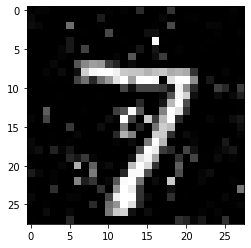

3


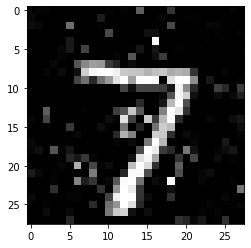

2


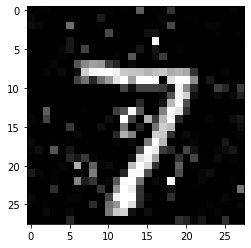

2


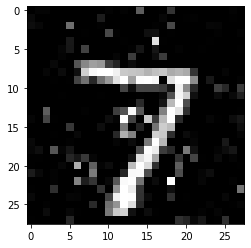

2


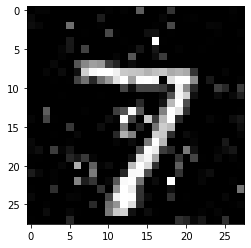

2


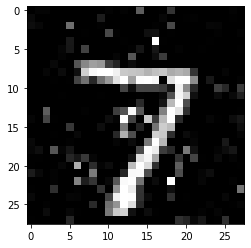

2


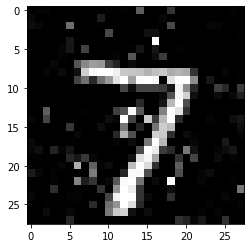

2


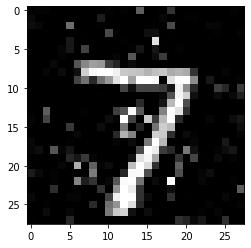

2


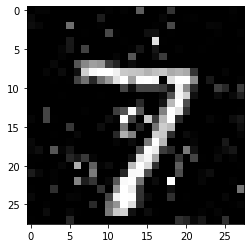

1


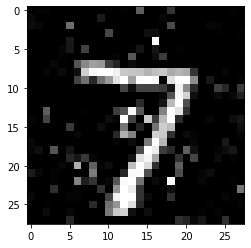

2


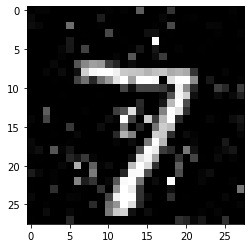

3


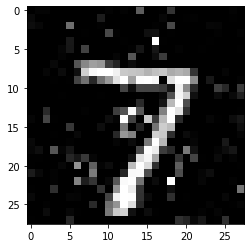

4


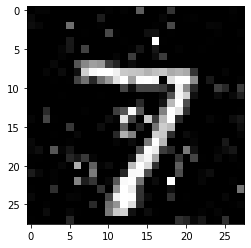

2


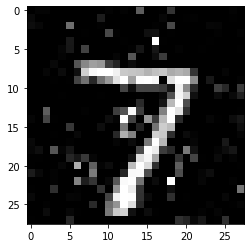

2


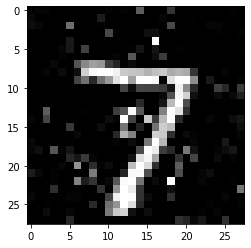

3


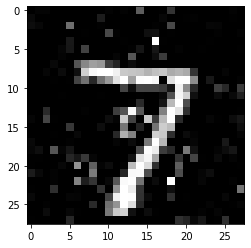

2


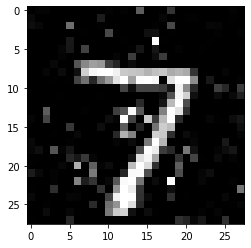

2


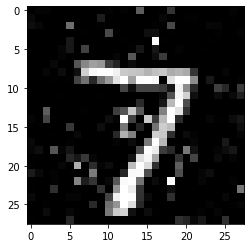

2


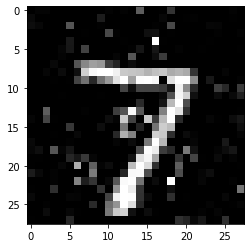

3


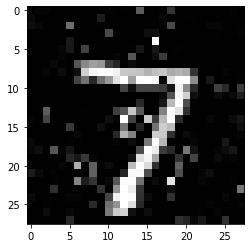

6


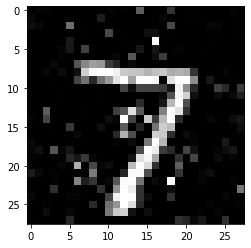

3


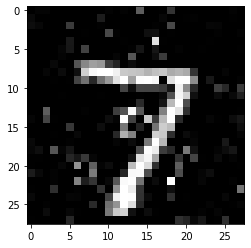

3


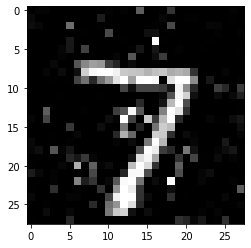

3


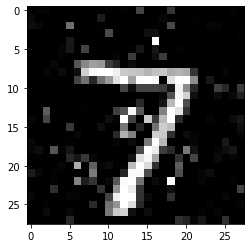

1


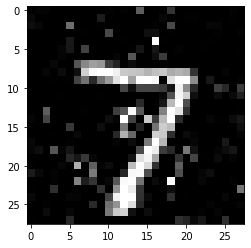

0


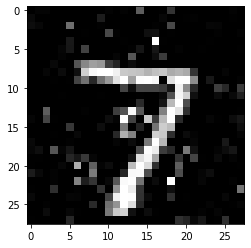

5


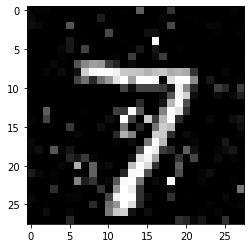

1


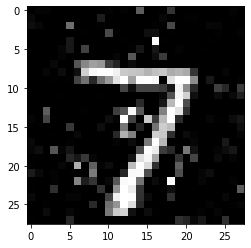

2


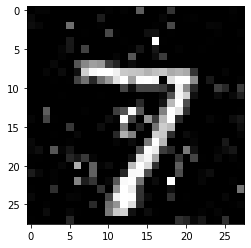

3


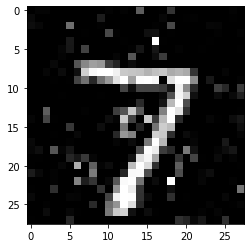

3


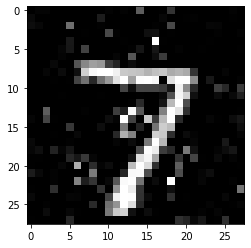

3


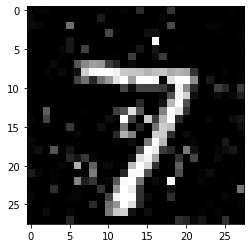

1


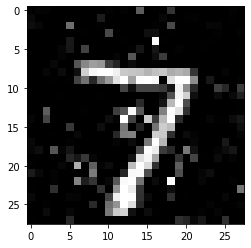

2


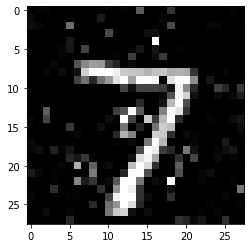

2


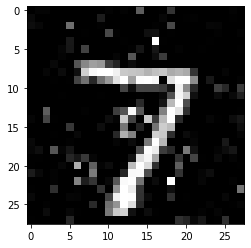

2


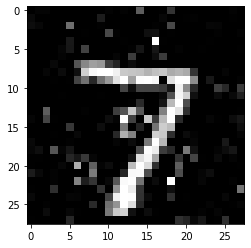

1


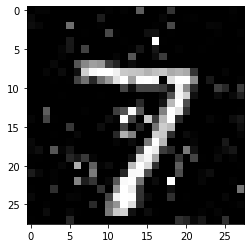

1


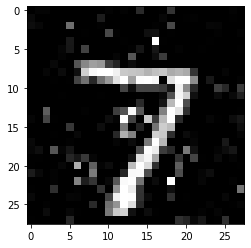

1


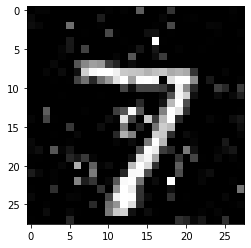

1


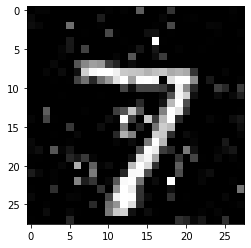

1


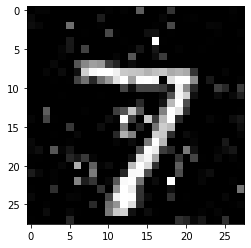

2


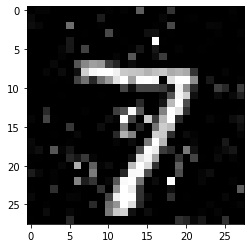

4


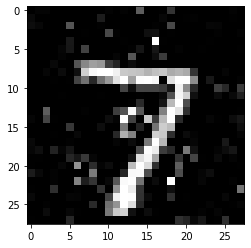

2


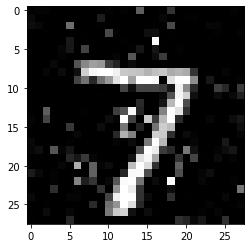

1


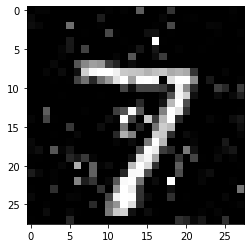

2


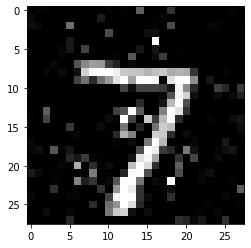

2


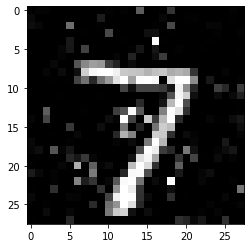

4


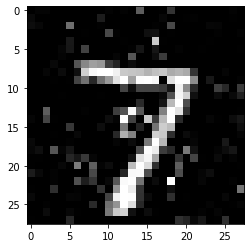

1


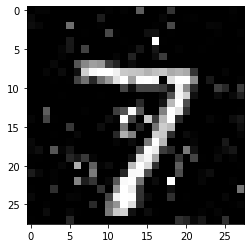

2


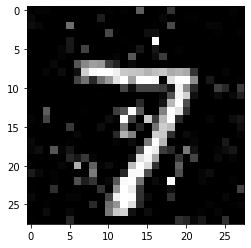

4


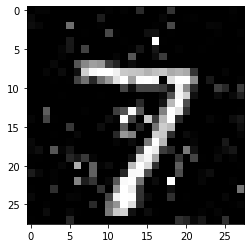

3


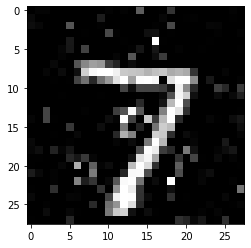

2


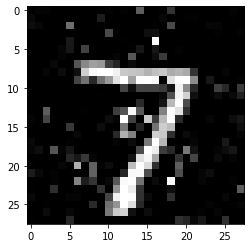

3


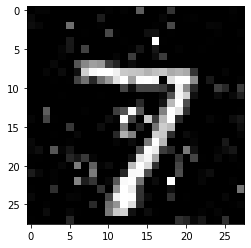

3


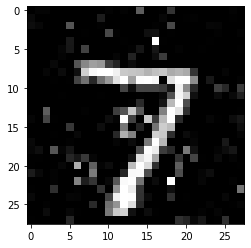

2


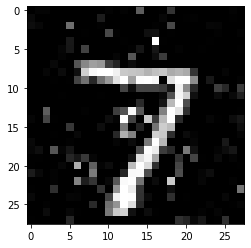

2


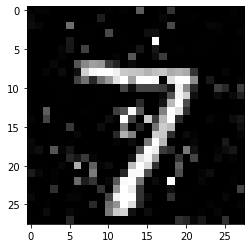

1


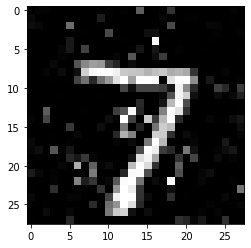

1


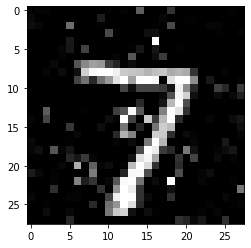

1


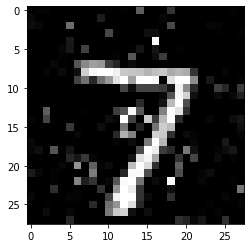

1


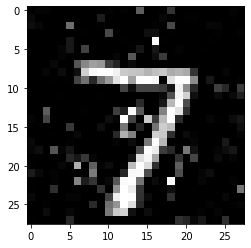

1


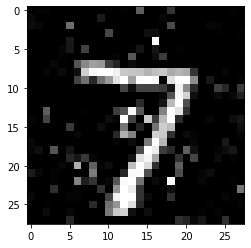

2


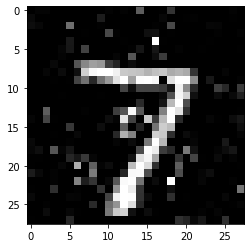

1


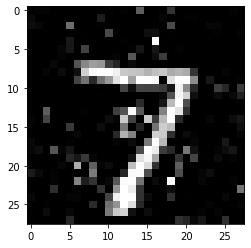

2


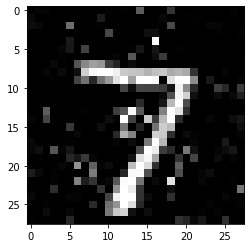

4


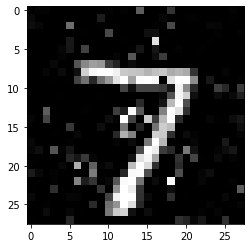

4


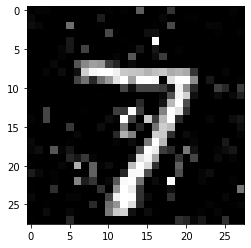

1


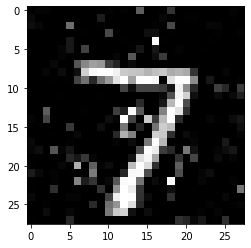

2


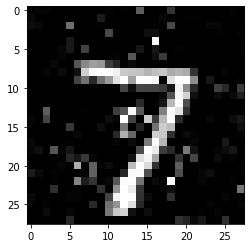

1


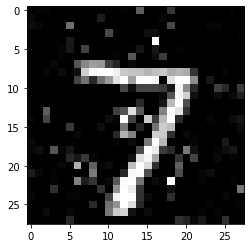

4


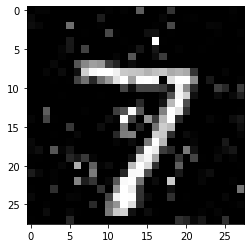

2


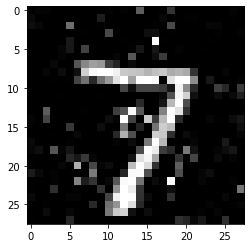

2


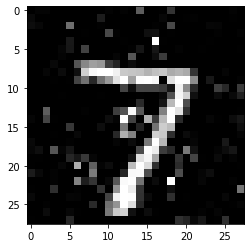

4


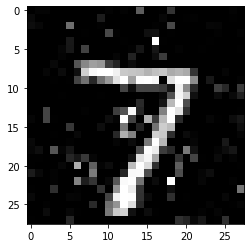

3


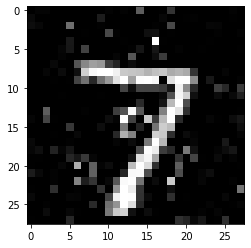

4


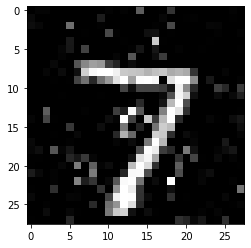

1


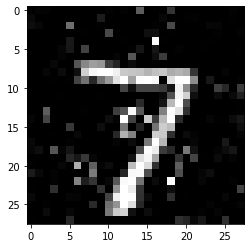

2


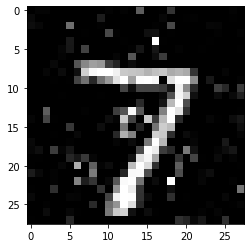

2


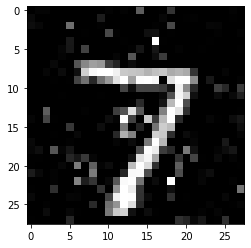

3


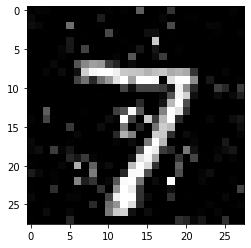

2


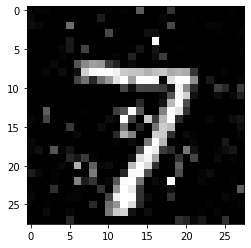

1


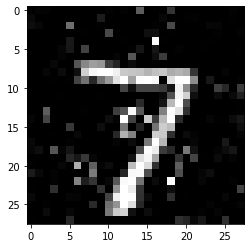

4


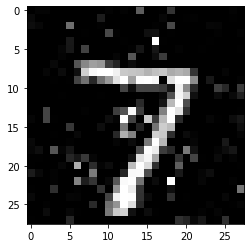

1


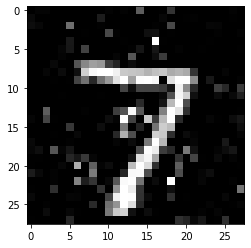

2


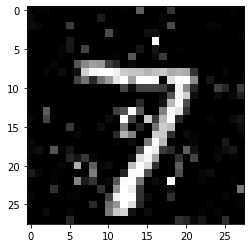

2


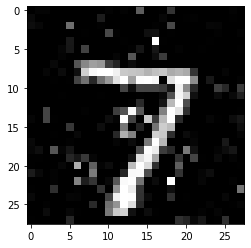

0


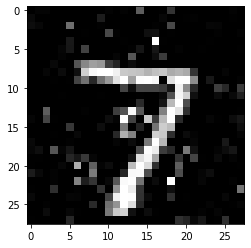

2


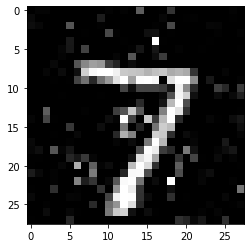

2


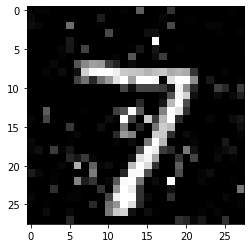

3


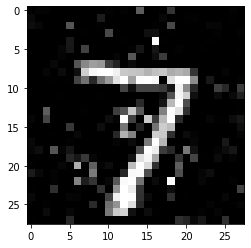

3


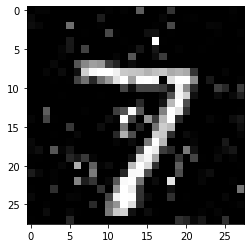

3


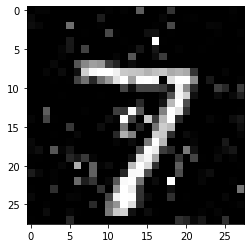

2


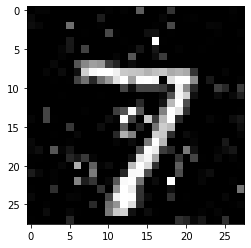

2


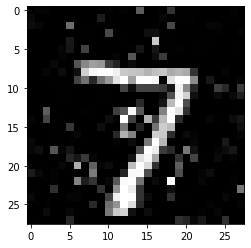

5


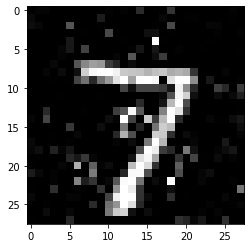

2


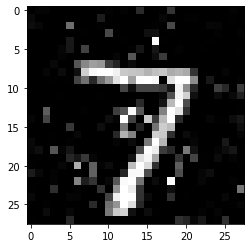

3


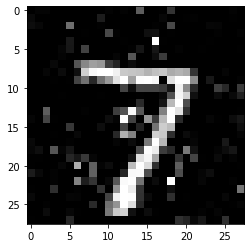

6


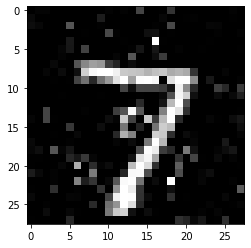

0


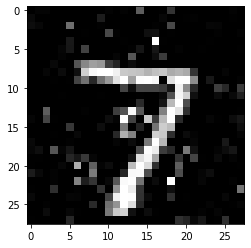

4


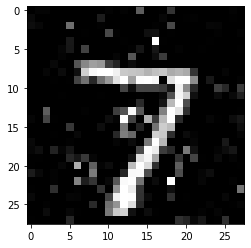

In [8]:
# 种群生成方法1
import copy
x_tmp = copy.deepcopy(x_dif)
x_des = []
for r in range(100):
    count = 0
    for k in range(784):
        if x_dif[k] > 0.2:
            x = random.randint(0,10000)/10000
            if x <= 0.1:
                x_tmp[k] -= random.randint(1,2)/10
                count += 1
    print(count)
    x_des.append(np.array(x_tmp.reshape(1,784)))
    x_re = x_tmp+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_dif)

378


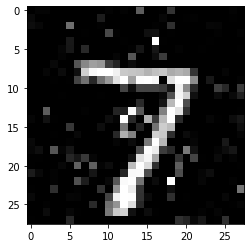

11


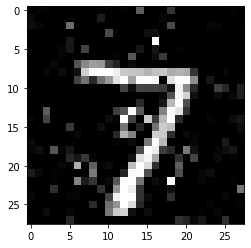

357


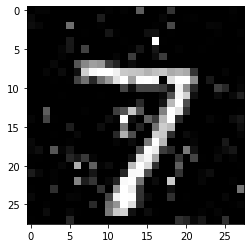

20


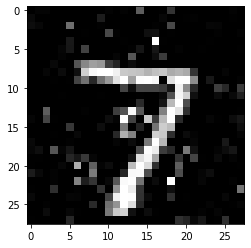

52


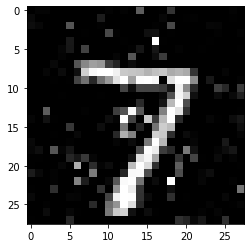

259


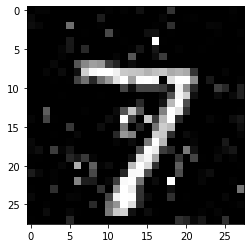

127


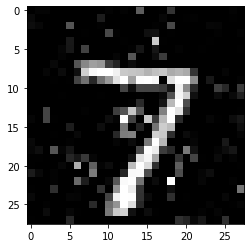

127


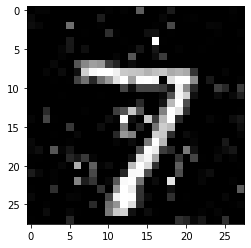

95


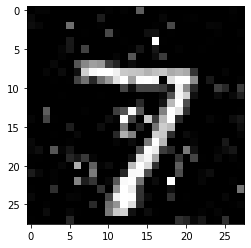

80


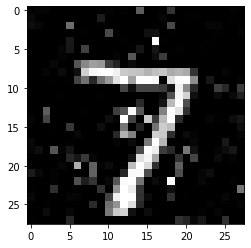

122


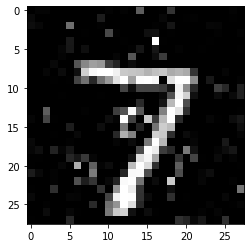

347


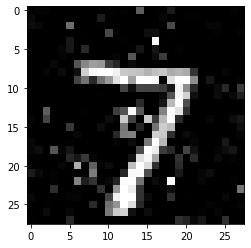

109


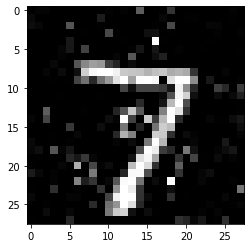

306


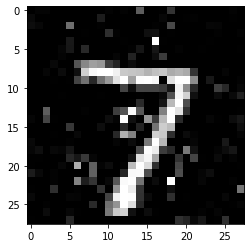

275


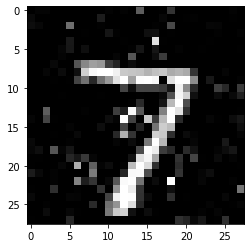

57


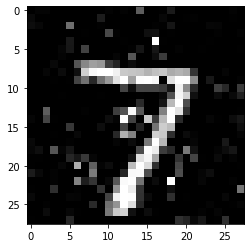

32


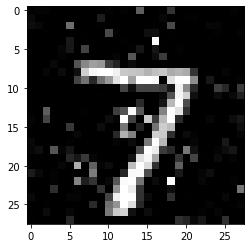

125


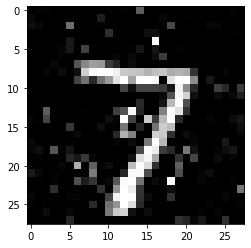

201


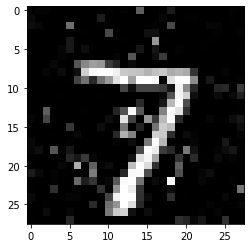

101


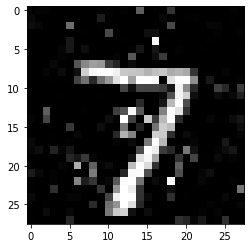

160


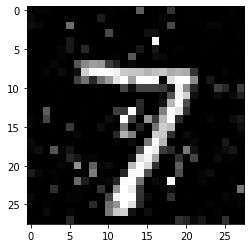

332


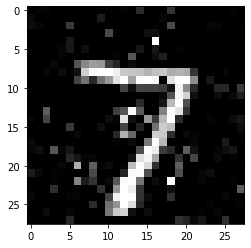

144


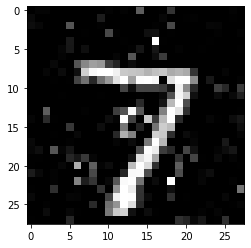

429


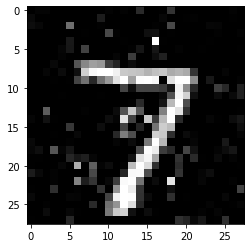

28


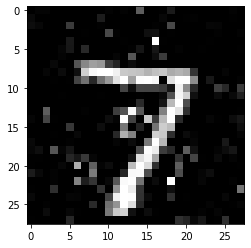

364


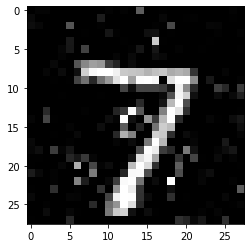

400


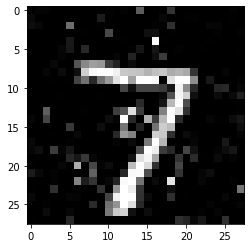

115


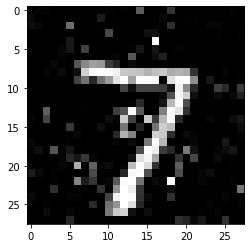

152


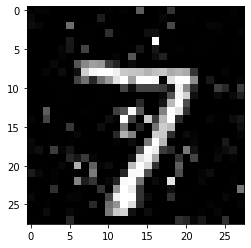

244


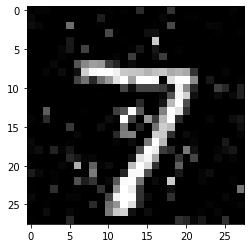

279


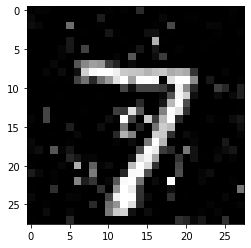

60


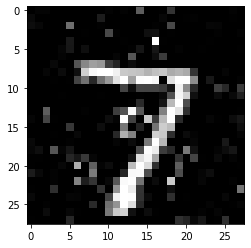

220


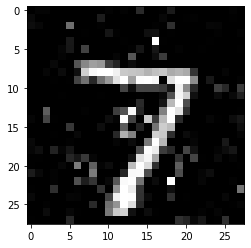

70


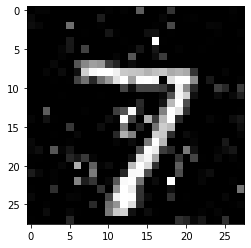

423


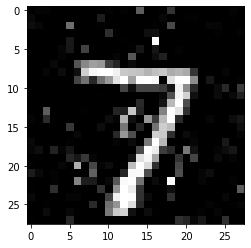

44


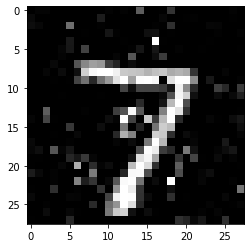

40


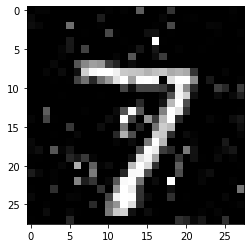

306


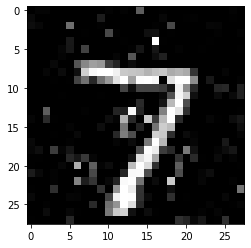

263


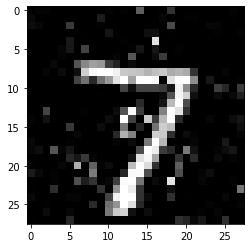

125


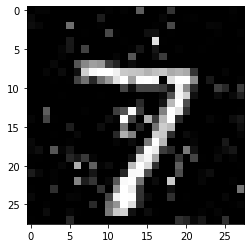

402


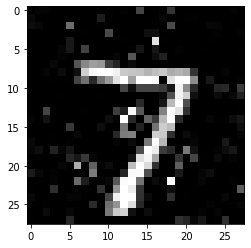

193


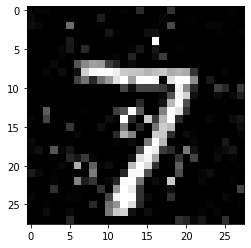

76


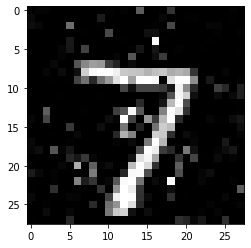

63


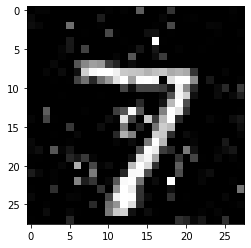

300


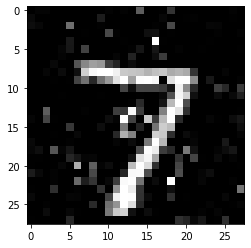

102


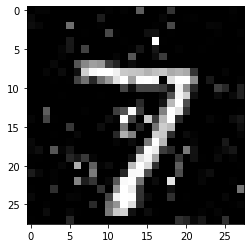

25


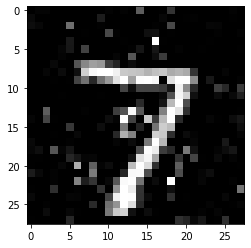

55


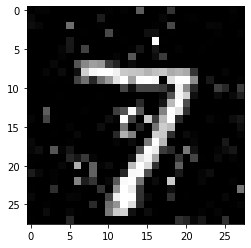

309


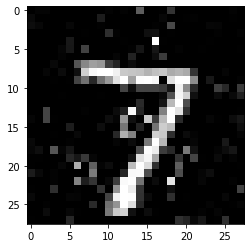

354


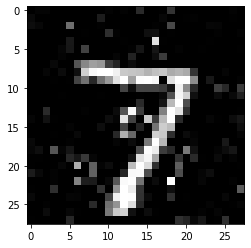

416


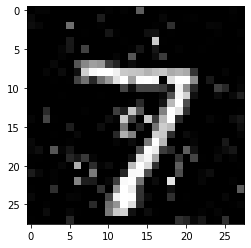

248


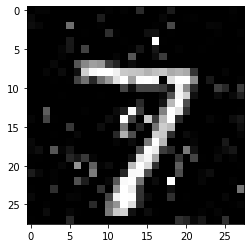

259


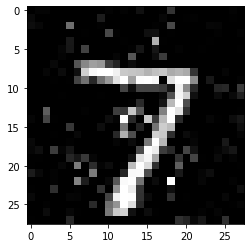

181


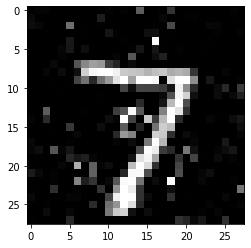

86


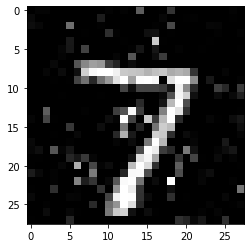

18


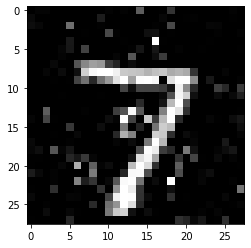

409


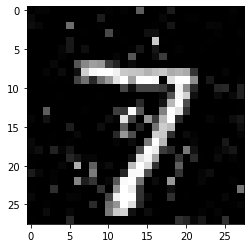

264


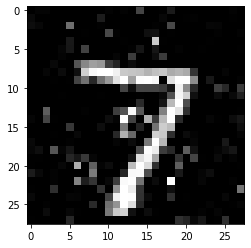

271


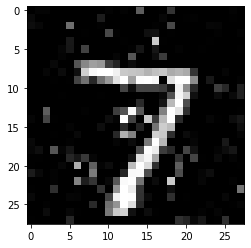

171


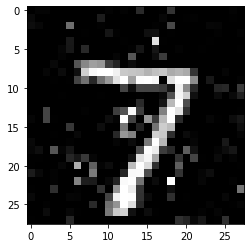

364


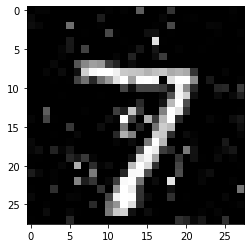

265


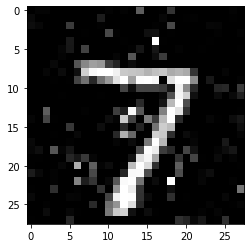

43


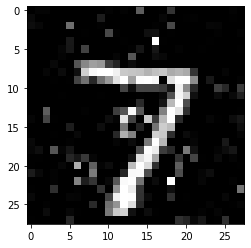

404


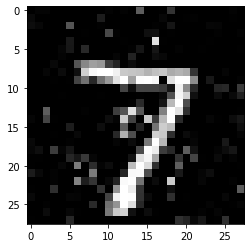

47


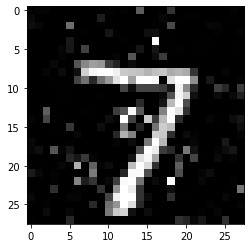

344


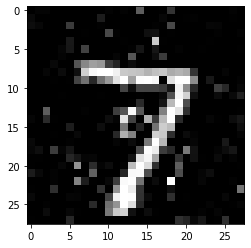

431


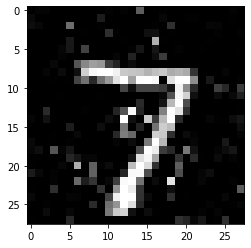

186


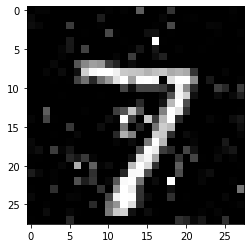

58


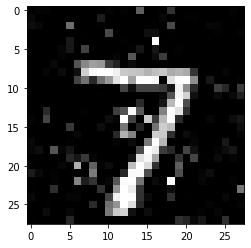

295


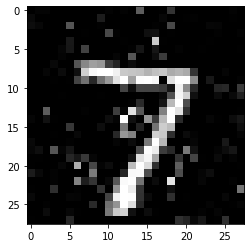

215


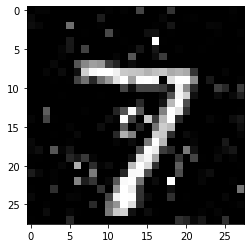

407


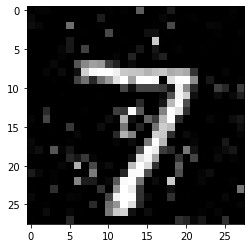

248


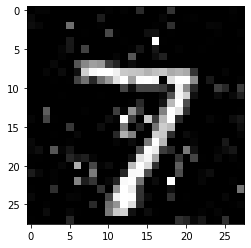

405


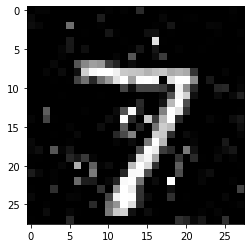

197


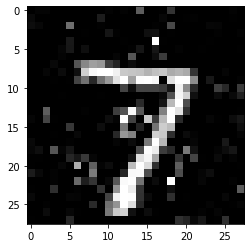

413


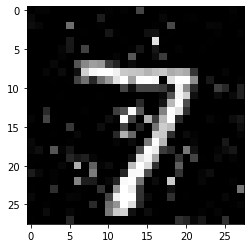

37


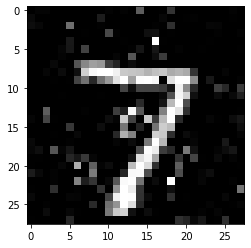

369


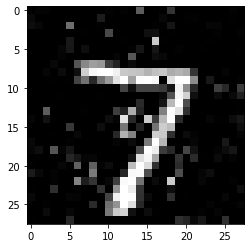

19


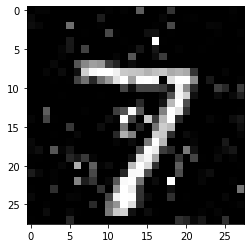

38


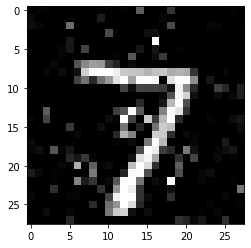

30


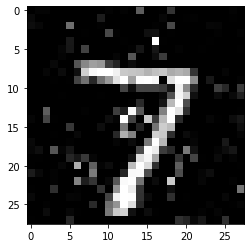

194


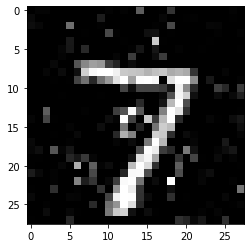

172


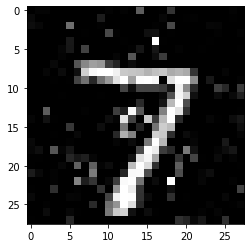

433


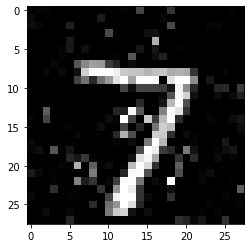

53


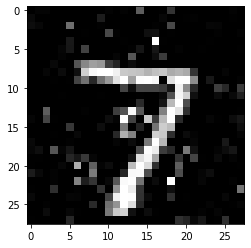

296


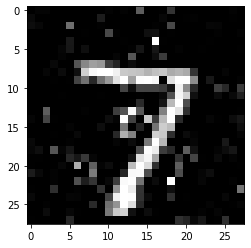

154


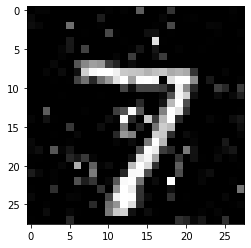

270


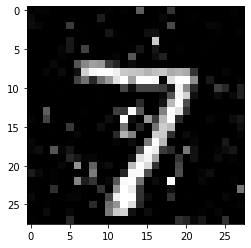

414


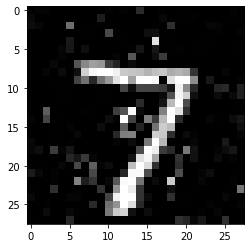

96


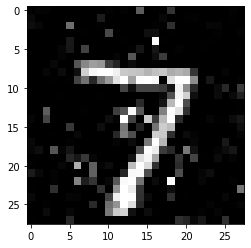

42


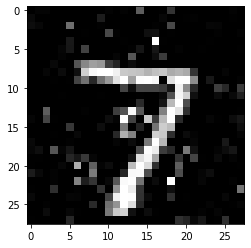

392


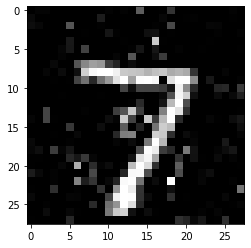

285


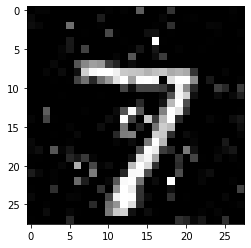

240


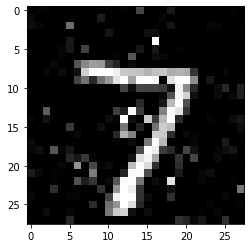

148


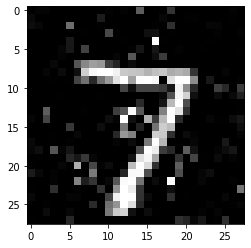

219


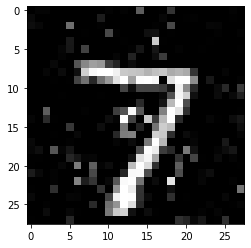

233


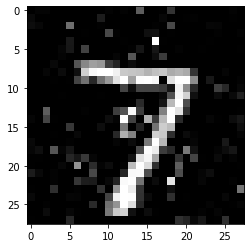

192


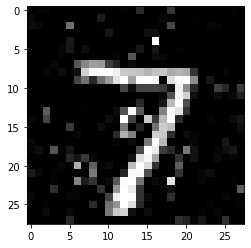

68


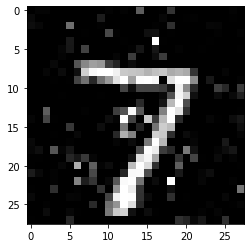

307


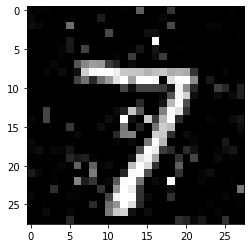

In [9]:
# 种群生成方法2
import copy
x_tmp = copy.deepcopy(x_dif)
x_des1 = []
for r in range(100):
    x = []
    L = random.randint(1,436)  # 436个攻击点
    for i in range(L):
        x.append(random.randint(0,783))
        if x_tmp[x[i]] > 0.2:
            x_tmp[x[i]] -= random.randint(1,2)/10

    x_des1.append(np.array(x_tmp.reshape(1,784)))
    print(L)
    x_re = x_tmp+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_dif)

In [4]:
model = load_model('mnist_model.h5')

In [5]:
def Func(x):     # 将攻击点与原图结合
    d3 = x+x_test[0]/255
    result=model.predict(d3.reshape(1,784))
    return result[0][7]

In [6]:
def Dis(x):   # 扰动值
    res = 0
    for i in range(784):
        l = x[i]
        res += l**2
    return res

最优值： 0.3464581 扰动程度 11.140451087727081
最优值： 0.3464581 扰动程度 11.140451087727081
最优值： 0.3556297 扰动程度 11.077281617372677
最优值： 0.37892804 扰动程度 10.949011749212284
最优值： 0.3683491 扰动程度 10.793264619079126
最优值： 0.39246258 扰动程度 10.58966030525457
最优值： 0.41380924 扰动程度 10.284163825166104
最优值： 0.41380924 扰动程度 10.284163825166104
最优值： 0.4397512 扰动程度 9.86156565250586
最优值： 0.4379953 扰动程度 9.891978677939973
最优值： 0.43572003 扰动程度 9.93016226722586
最优值： 0.45811206 扰动程度 9.807391247310317
最优值： 0.46164304 扰动程度 9.756476015467095
最优值： 0.47201675 扰动程度 9.656031771540938
最优值： 0.47217143 扰动程度 9.590388572975321
最优值： 0.48548174 扰动程度 9.498021118828783
最优值： 0.4859608 扰动程度 9.375384867186286
最优值： 0.50856304 扰动程度 9.277685726506984
最优值： 0.510544 扰动程度 9.046637503246606
最优值： 0.510544 扰动程度 9.046637503246606
最优值： 0.53875697 扰动程度 8.803021789331948
最优值： 0.5347394 扰动程度 8.832552497680778
最优值： 0.5453149 扰动程度 8.741989576360632
最优值： 0.59117377 扰动程度 8.501357783571741
最优值： 0.59534466 扰动程度 8.458000455041306
最优值： 0.58801717 扰动程度 8.3923958632

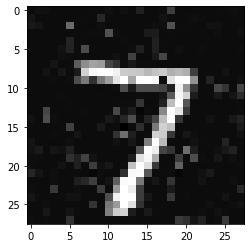

In [13]:
#种群1 不限强度
MAX_GENERATION = 100  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 100  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
                    elif V[i, j] <= 1:
                        if V[i, j] + x_test[0][j]/255 > 1:
                            # V +t = 1-(V+t-1)
                            V[i, j] = 1-(V[i, j]+2*x_test[0][j]/255-1)
                            #print(V[i, j])
                        elif V[i, j] + x_test[0][j]/255 < 0:
                            V[i, j] = -x_test[0][j]/255
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.3052223 扰动程度 11.948796375038475
最优值： 0.30941603 扰动程度 11.883796006605676
最优值： 0.30941603 扰动程度 11.883796006605676
最优值： 0.3130597 扰动程度 11.851079022606077
最优值： 0.3130597 扰动程度 11.851079022606077
最优值： 0.33315432 扰动程度 11.714631478833914
最优值： 0.33315432 扰动程度 11.714631478833914
最优值： 0.33492142 扰动程度 11.667587723280313
最优值： 0.33733952 扰动程度 11.64832304920764
最优值： 0.3415591 扰动程度 11.535579481115732
最优值： 0.3438487 扰动程度 11.49545188807653
最优值： 0.3438487 扰动程度 11.49545188807653
最优值： 0.34536085 扰动程度 11.491798205442969
最优值： 0.34536085 扰动程度 11.491798205442969
最优值： 0.34647638 扰动程度 11.472713259311956
最优值： 0.35015598 扰动程度 11.453201058656342
最优值： 0.3527574 扰动程度 11.422075532197544
最优值： 0.3527574 扰动程度 11.422075532197544
最优值： 0.36317408 扰动程度 11.342358480476513
最优值： 0.3691371 扰动程度 11.281079039261801
最优值： 0.3746326 扰动程度 11.158663617464292
最优值： 0.3746076 扰动程度 11.156386108030384
最优值： 0.37794203 扰动程度 11.127848580226916
最优值： 0.38057598 扰动程度 11.108200783154803
最优值： 0.38057598 扰动程度 11.108200783154803
最优值： 0.3854144

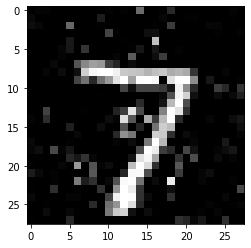

In [16]:
#种群2  不限强度
MAX_GENERATION = 100  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 100  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X_2 = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des1, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X_2 = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X_2 + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
                    elif V[i, j] <= 1:
                        if V[i, j] + x_test[0][j]/255 > 1:
                            # V +t = 1-(V+t-1)
                            V[i, j] = 1-(V[i, j]+2*x_test[0][j]/255-1)
                            #print(V[i, j])
                        elif V[i, j] + x_test[0][j]/255 < 0:
                            V[i, j] = -x_test[0][j]/255
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X_2适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X_2 = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X_2),"扰动程度",Dis(BEST_X_2))
        if GENERATION == MAX_GENERATION:
            BEST_2 = BEST_X_2+x_test[0]/255
            print(BEST_X_2)
            plt.imshow(BEST_2.reshape(28,28),cmap='gray')
            plt.show()
            break

In [17]:
BEST_X

array([ 0.00000000e+00,  1.93915469e-02,  1.68525285e-02,  0.00000000e+00,
        3.49676919e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.61172548e-03,  0.00000000e+00,  1.49916475e-02,  0.00000000e+00,
        1.32935687e-02,  0.00000000e+00,  8.48229878e-02,  5.99771829e-05,
        0.00000000e+00,  3.99694463e-03,  2.02473960e-01,  0.00000000e+00,
        0.00000000e+00,  2.97542257e-05,  0.00000000e+00,  0.00000000e+00,
        3.06733030e-03,  3.76205681e-03,  1.19846416e-02,  0.00000000e+00,
        3.65233509e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.57725719e-03,
        0.00000000e+00,  1.09627710e-01,  3.42945277e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.74810468e-02,  2.37707016e-03,  0.00000000e+00,
        3.95972895e-03,  9.67545701e-03,  9.77746303e-04,  0.00000000e+00,
        0.00000000e+00,  

In [18]:
BEST_X_2

array([ 0.00000000e+00,  1.93915469e-02,  1.68525285e-02,  0.00000000e+00,
        3.49676919e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.61172548e-03,  0.00000000e+00,  1.49916475e-02,  0.00000000e+00,
        1.32935687e-02,  0.00000000e+00,  4.18163069e-01,  5.99771829e-05,
        0.00000000e+00,  3.99694463e-03,  1.60422322e-01,  0.00000000e+00,
        0.00000000e+00,  2.97542257e-05,  0.00000000e+00,  0.00000000e+00,
        3.06733030e-03,  3.76205681e-03,  1.19846416e-02,  0.00000000e+00,
        3.65233509e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.57725719e-03,
        0.00000000e+00,  1.09627710e-01,  3.42945277e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.74810468e-02,  2.37707016e-03,  0.00000000e+00,
        3.95972895e-03,  9.67545701e-03,  9.77746303e-04,  0.00000000e+00,
        0.00000000e+00,  

In [7]:
BEST_X_2=([ 0.00000000e+00,  1.93915469e-02,  1.68525285e-02,  0.00000000e+00,
        3.49676919e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.61172548e-03,  0.00000000e+00,  1.49916475e-02,  0.00000000e+00,
        1.32935687e-02,  0.00000000e+00,  4.18163069e-01,  5.99771829e-05,
        0.00000000e+00,  3.99694463e-03,  1.60422322e-01,  0.00000000e+00,
        0.00000000e+00,  2.97542257e-05,  0.00000000e+00,  0.00000000e+00,
        3.06733030e-03,  3.76205681e-03,  1.19846416e-02,  0.00000000e+00,
        3.65233509e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.57725719e-03,
        0.00000000e+00,  1.09627710e-01,  3.42945277e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.74810468e-02,  2.37707016e-03,  0.00000000e+00,
        3.95972895e-03,  9.67545701e-03,  9.77746303e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.25049215e-03,  0.00000000e+00,
        5.22812534e-02,  3.09219786e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.02586201e-01,  0.00000000e+00,  2.45567754e-05,
        0.00000000e+00,  9.22521253e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.32451358e-04,  0.00000000e+00,  0.00000000e+00,
        9.47645935e-03,  7.17767683e-03,  2.30455522e-01,  9.30684572e-04,
        3.22158220e-03,  0.00000000e+00,  0.00000000e+00,  2.49743190e-02,
        1.95581329e-02,  0.00000000e+00,  4.71618941e-04,  2.27711006e-03,
        5.04624608e-04,  0.00000000e+00,  0.00000000e+00,  5.94740588e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.20473935e-03,
        1.58864847e-03,  1.80060310e-03,  2.69321375e-01,  1.00602110e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.09164501e-02,
        6.31541864e-02,  0.00000000e+00,  4.36657732e-03,  0.00000000e+00,
        1.70254858e-03,  0.00000000e+00,  2.96283132e-03,  0.00000000e+00,
        9.84179798e-03,  0.00000000e+00,  0.00000000e+00,  1.45982153e-02,
        0.00000000e+00,  0.00000000e+00,  1.62377645e-03,  1.78330359e-04,
        0.00000000e+00,  9.43008971e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.38284658e-05,  5.50623538e-04,  0.00000000e+00,
        6.79673358e-03,  0.00000000e+00,  0.00000000e+00,  2.59484190e-05,
        7.54741513e-01,  3.97289606e-03,  0.00000000e+00,  6.38134634e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.48225287e-03,
        0.00000000e+00,  0.00000000e+00,  1.82797151e-04,  0.00000000e+00,
        3.40647969e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.42753998e-02,  9.02423758e-02,  0.00000000e+00,  2.09358312e-01,
        3.44577166e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.89640959e-03,  8.35040044e-02,  0.00000000e+00,
        8.66552575e-02,  0.00000000e+00,  0.00000000e+00,  1.43691718e-02,
        1.16692826e-05,  0.00000000e+00,  5.93455705e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.32716450e-03,
        0.00000000e+00,  0.00000000e+00,  6.25727523e-05,  0.00000000e+00,
        1.65445693e-02,  1.32948104e-03,  0.00000000e+00,  0.00000000e+00,
        1.39315580e-04,  0.00000000e+00,  1.62740647e-03,  2.13255625e-02,
        6.37968586e-05,  3.56930882e-01,  0.00000000e+00,  6.94035356e-04,
        5.29717351e-02,  2.41240633e-01,  0.00000000e+00,  5.12903864e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.00287327e-04,
        2.37485396e-03,  0.00000000e+00,  2.55805803e-03,  3.40123509e-02,
        0.00000000e+00,  1.09574722e-03,  0.00000000e+00, -1.96934331e-01,
        0.00000000e+00, -7.21006745e-04,  4.55808353e-04,  4.59460341e-03,
        0.00000000e+00,  4.27703965e-02,  2.72580670e-03,  3.73559744e-03,
        4.49137341e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.51446337e-05,  2.37931088e-04,
        2.96338709e-03,  2.11322772e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.67242870e-02,  0.00000000e+00,
        4.55025482e-02,  0.00000000e+00, -8.08132030e-01, -1.83313257e-01,
       -2.49528524e-02,  0.00000000e+00, -1.51524373e-04, -3.27480822e-03,
        8.79156676e-03, -4.83795524e-03, -1.51602632e-02, -7.57506362e-02,
       -2.53570892e-02,  3.18398176e-03, -1.06931339e-01, -7.51344652e-02,
        0.00000000e+00,  6.47216373e-04,  0.00000000e+00,  0.00000000e+00,
        3.80863096e-04,  2.23580686e-02,  7.86738688e-04,  1.71550974e-04,
        0.00000000e+00,  5.93426623e-04,  0.00000000e+00,  6.44809994e-03,
        4.39554953e-05,  6.56369439e-03,  1.98610961e-04, -1.56033253e-03,
       -1.26157934e-01, -8.23269529e-04, -3.65509123e-02,  3.81509569e-04,
       -3.71043373e-04, -2.47209225e-01, -8.25254637e-03,  2.67771663e-03,
       -2.62949954e-02, -9.74091357e-01, -1.59478727e-02,  5.69971627e-04,
        2.89197263e-03,  1.86877516e-03,  4.91762610e-04,  9.28492616e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.33286900e-02,
        1.12568782e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.52426447e-03,  3.69563932e-04,
        0.00000000e+00,  3.58818841e-04,  0.00000000e+00, -6.47653634e-02,
        3.71520159e-03,  0.00000000e+00,  4.88494996e-03,  0.00000000e+00,
        0.00000000e+00,  2.11923980e-04,  2.37736712e-03,  1.63243079e-02,
       -4.46009858e-01, -2.57797021e-01,  5.90128454e-04,  2.83216341e-03,
        2.38711864e-01,  1.63779614e-01,  0.00000000e+00,  1.96842208e-01,
        7.71251919e-05,  0.00000000e+00,  4.72996370e-05,  0.00000000e+00,
        6.59633319e-03,  0.00000000e+00,  0.00000000e+00,  4.01748589e-05,
        0.00000000e+00,  4.79693396e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.45634697e-05,  6.41472071e-03,  2.57604930e-03,
        0.00000000e+00,  3.71426495e-02, -9.48516908e-03, -3.27756127e-02,
        0.00000000e+00, -7.48427809e-03,  0.00000000e+00,  3.21782019e-03,
        4.64438633e-02,  9.76239145e-05,  3.62949052e-02,  1.32602711e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.27416545e-04,  2.47218987e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.83532452e-03,
        3.06319901e-03,  7.81158711e-03,  1.67687618e-01,  2.66745487e-05,
        2.25652628e-04, -2.50475620e-03, -1.89702087e-01, -5.32671000e-04,
       -1.90528701e-02,  0.00000000e+00,  1.04707736e-04,  0.00000000e+00,
        7.60999859e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.15687568e-04,  0.00000000e+00,  2.59454531e-01,  0.00000000e+00,
        0.00000000e+00,  2.88923446e-03,  3.03395672e-05,  8.15398219e-03,
        0.00000000e+00,  0.00000000e+00,  4.92358037e-05,  1.34671836e-01,
        2.39704436e-01,  8.93918482e-01,  2.87274742e-01,  2.71666703e-03,
        1.71614911e-04, -4.73509412e-05, -3.85455373e-04, -4.36015333e-02,
        1.59994594e-02,  1.78785845e-04,  6.77919592e-05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.45980727e-03,
        2.18918779e-02,  0.00000000e+00,  1.73009424e-01,  7.47781053e-03,
        0.00000000e+00,  7.83143425e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.07565677e-02,  1.91847758e-02,
        8.64192485e-01,  3.36010112e-01,  5.84264887e-04,  6.71190069e-01,
        1.23679804e-05, -2.52288487e-01,  1.61271663e-03, -7.80015139e-02,
        1.13231732e-05,  0.00000000e+00,  0.00000000e+00,  2.47972672e-02,
        3.96413918e-03,  0.00000000e+00,  5.00822125e-02,  8.86926427e-02,
        1.42417446e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.37579316e-03,  1.23013277e-01,  1.49346944e-04,  4.59096004e-04,
        0.00000000e+00,  5.17162962e-02,  3.86175833e-04,  0.00000000e+00,
        3.15564452e-01,  0.00000000e+00,  1.39781869e-01,  0.00000000e+00,
       -7.19693375e-02, -1.92959598e-01,  1.53221367e-03, -1.92896339e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.52615513e-05,  5.47446165e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.76230608e-03,
        0.00000000e+00,  0.00000000e+00,  3.50118310e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.56774687e-01,
        5.59363958e-01,  4.56850789e-01,  7.45297018e-05, -3.06489323e-02,
        6.23358137e-03, -1.85287555e-01, -4.19417074e-02,  7.86003012e-04,
        4.54134971e-02,  1.23362293e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.09178783e-02,
        3.26357132e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.74175846e-04,  1.00950064e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.19567268e-02,
        0.00000000e+00,  4.41505413e-02,  0.00000000e+00, -1.67132181e-02,
       -7.64735373e-04,  7.93136804e-04,  0.00000000e+00,  0.00000000e+00,
        1.06494432e-04,  2.50240477e-02,  1.00554559e-03,  0.00000000e+00,
        0.00000000e+00,  9.45456911e-02,  0.00000000e+00,  0.00000000e+00,
        2.36071431e-02,  5.68503132e-02,  6.52328930e-04,  2.82717499e-01,
        2.10247702e-02,  8.24734770e-02,  0.00000000e+00,  1.88936292e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.82077963e-05,  0.00000000e+00, -6.12977059e-04,  3.44715510e-04,
       -1.36316746e-02,  1.08703682e-02,  1.63266230e-01,  0.00000000e+00,
        2.71092264e-01,  7.40989623e-02,  0.00000000e+00,  0.00000000e+00,
        1.60373513e-02,  4.85531245e-02,  8.96844089e-02,  0.00000000e+00,
        6.49322242e-03,  7.17471499e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.51275287e-01,  8.65767220e-02,  2.02068435e-01,
        2.59936290e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.94587678e-04,  8.61559533e-03, -3.18222714e-02,
        9.09002843e-04,  0.00000000e+00,  0.00000000e+00,  1.96612156e-01,
        0.00000000e+00,  2.96953776e-01,  5.27318719e-03,  0.00000000e+00,
        4.02370024e-02,  0.00000000e+00,  1.58344300e-02,  0.00000000e+00,
        7.69653767e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.93958376e-02,  0.00000000e+00,  5.97914605e-01,  0.00000000e+00,
        3.25869410e-01,  1.66289596e-02,  4.91288597e-02,  0.00000000e+00,
        0.00000000e+00, -5.52795584e-02,  0.00000000e+00,  0.00000000e+00,
        4.77715360e-02,  0.00000000e+00,  2.42393800e-03,  3.43423872e-01,
        3.29317477e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.84049118e-04,  0.00000000e+00,  0.00000000e+00,  6.20601028e-03,
        1.06437708e-01,  3.29633199e-02,  5.60945628e-04,  1.19437586e-02,
        4.01053430e-05,  0.00000000e+00,  1.16864026e-03,  7.95684153e-04,
        3.42518208e-01,  2.77506087e-03,  1.26728030e-04,  0.00000000e+00,
        0.00000000e+00, -2.28365584e-02, -1.71585344e-02,  1.49934669e-03,
        2.25113928e-05,  2.05831956e-03,  1.37049065e-03,  2.32123365e-01,
        0.00000000e+00,  0.00000000e+00,  2.11070718e-02,  5.38340151e-02,
        0.00000000e+00,  0.00000000e+00,  1.87676394e-05,  0.00000000e+00,
        9.96508201e-05,  3.16784027e-04,  0.00000000e+00,  1.24429705e-02,
        3.36956021e-03,  0.00000000e+00,  4.81343372e-01,  1.14534329e-01,
        1.93814254e-01,  1.40955409e-04,  3.30317657e-02,  2.00866611e-01,
        9.94484405e-02, -2.37489737e-03, -8.73100157e-04,  1.65595660e-03,
        4.39387397e-02,  0.00000000e+00,  9.15513133e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.57945169e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.43857697e-02,  0.00000000e+00,
        5.71143230e-03,  0.00000000e+00,  0.00000000e+00,  1.83495077e-01,
        1.79612402e-03,  0.00000000e+00,  1.08598710e-02,  1.88510875e-05,
        7.38806327e-05,  1.95255631e-01,  0.00000000e+00,  5.62752935e-02,
        0.00000000e+00, -7.24517234e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.81559561e-02,  0.00000000e+00,
        2.94291060e-04,  1.90069200e-05,  3.68608530e-05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.90738889e-05,  2.74439756e-01,
        3.41042158e-02,  1.24241048e-03,  0.00000000e+00,  0.00000000e+00,
        1.08563238e-03,  2.32981725e-02,  1.87947911e-02,  1.05987880e-04,
        2.09859416e-03,  0.00000000e+00,  2.60963527e-02, -7.23030284e-03,
        2.02305063e-03, -9.10507373e-04, -8.54741163e-03,  4.10851449e-02,
        0.00000000e+00,  0.00000000e+00,  1.84575620e-01,  0.00000000e+00,
        5.49850131e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.82495537e-02,  0.00000000e+00,  0.00000000e+00,
        1.80943202e-03,  0.00000000e+00,  1.12174752e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.56362630e-03,  0.00000000e+00,
        1.66387735e-01,  5.86533146e-04, -3.67891069e-02, -4.18979699e-01,
        0.00000000e+00,  1.15549536e-02, -6.87430980e-05,  1.27406769e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.54467266e-05,  1.38662917e-04,  0.00000000e+00,  1.59384524e-02,
        0.00000000e+00,  0.00000000e+00,  7.22661095e-03,  2.31772879e-02,
        0.00000000e+00,  8.31487952e-04,  4.53225860e-02,  0.00000000e+00,
        3.42152297e-05,  2.99047352e-02,  4.84274771e-03,  1.19430685e-05,
        0.00000000e+00,  0.00000000e+00, -2.86614692e-03, -2.04377650e-01,
        9.62410512e-03, -3.02944289e-03,  0.00000000e+00,  5.03110594e-02,
        4.92741573e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.20115177e-05,  2.67222987e-03,  1.23819386e-02,  0.00000000e+00,
        1.96840452e-02,  1.18748041e-03,  3.51867857e-04,  0.00000000e+00,
        6.81649148e-03,  0.00000000e+00,  2.21538371e-03,  0.00000000e+00,
        0.00000000e+00,  1.54709116e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.62673750e-03,  0.00000000e+00,  2.23410535e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.89486710e-01,
        1.45354093e-01,  2.85340177e-02,  8.89521485e-02,  0.00000000e+00,
        5.56214326e-03,  1.89336009e-01,  3.26361781e-04,  0.00000000e+00])

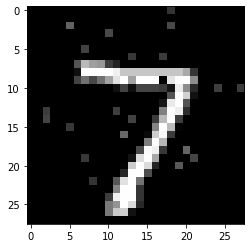

置信度： 0.9837247
[3.89337860e-04 1.10153334e-04 4.41717962e-03 8.47169291e-03
 4.96692701e-05 6.82085578e-04 3.22118353e-06 9.83724713e-01
 3.19586019e-04 1.83244131e-03]


In [22]:
#过滤1
import copy
x_f = copy.deepcopy(BEST_X)
for i in range(784):
    if abs(x_f[i]) < 0.2:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

迭代: 1
置信度： 0.98368007


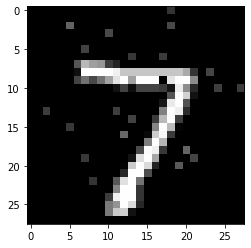

迭代: 2
置信度： 0.98365396


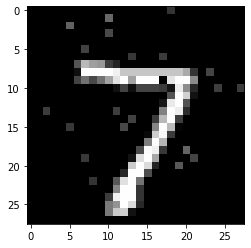

迭代: 3
置信度： 0.98341906


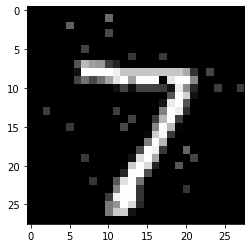

迭代: 4
置信度： 0.9832176


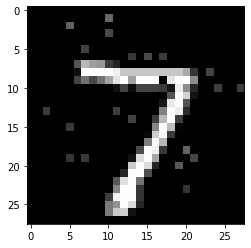

迭代: 5
置信度： 0.9800613


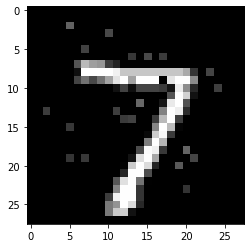

迭代: 6
置信度： 0.9789073


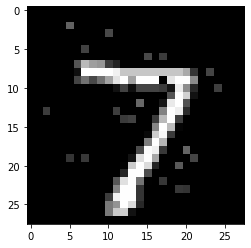

迭代: 7
置信度： 0.97756356


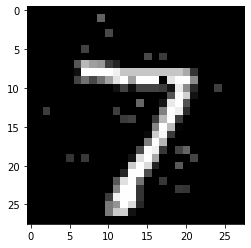

迭代: 8
置信度： 0.9771187


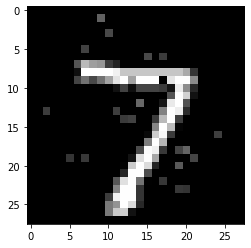

迭代: 9
置信度： 0.9762586


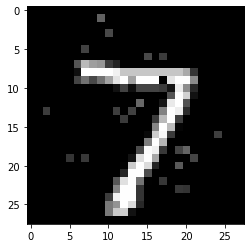

迭代: 10
置信度： 0.97625583


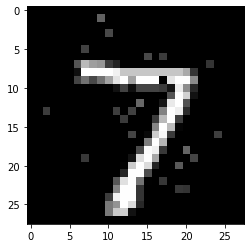

迭代: 11
置信度： 0.9747727


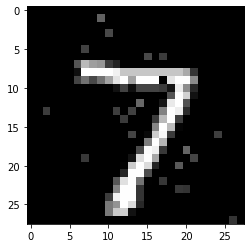

迭代: 12
置信度： 0.9744212


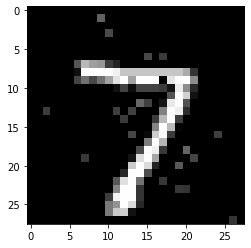

迭代: 13
置信度： 0.97328705


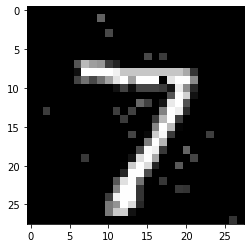

迭代: 14
置信度： 0.9718275


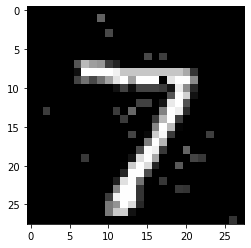

迭代: 15
置信度： 0.9706961


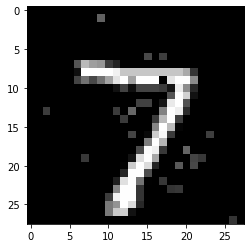

迭代: 16
置信度： 0.9704841


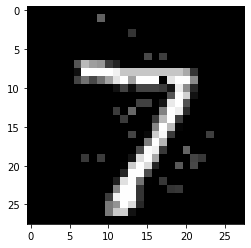

迭代: 17
置信度： 0.9703948


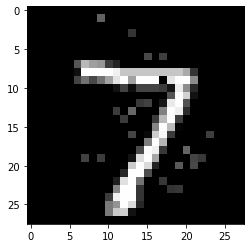

迭代: 18
置信度： 0.96909285


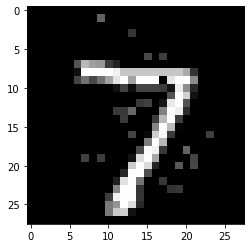

迭代: 19
置信度： 0.96894705


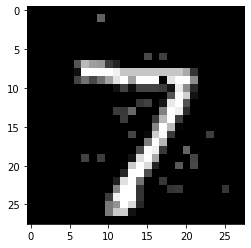

迭代: 20
置信度： 0.9688649


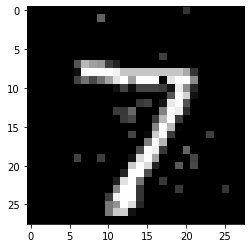

迭代: 21
置信度： 0.96868426


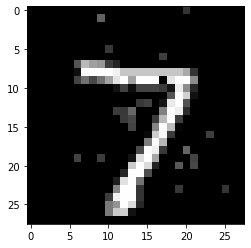

迭代: 22
置信度： 0.96847576


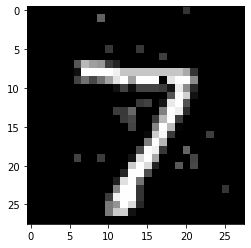

迭代: 23
置信度： 0.9679358


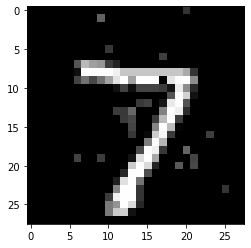

迭代: 24
置信度： 0.9671764


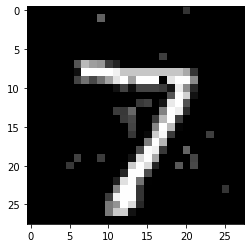

迭代: 25
置信度： 0.96717


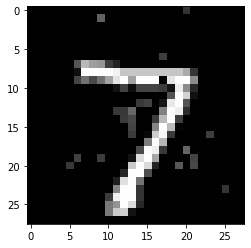

迭代: 26
置信度： 0.9668975


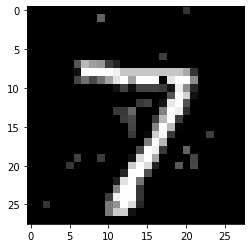

迭代: 27
置信度： 0.96645755


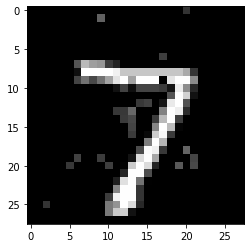

迭代: 28
置信度： 0.966238


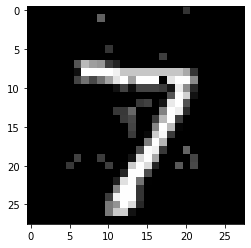

迭代: 29
置信度： 0.9661908


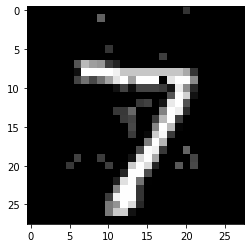

迭代: 30
置信度： 0.9659216


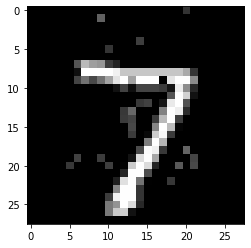

迭代: 31
置信度： 0.9656406


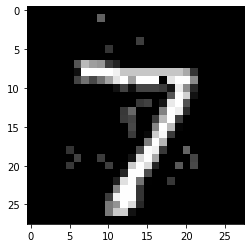

迭代: 32
置信度： 0.965397


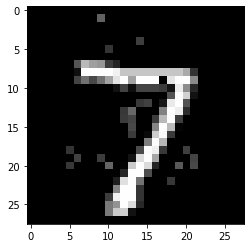

迭代: 33
置信度： 0.96531105


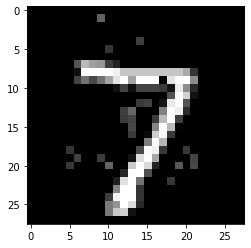

迭代: 34
置信度： 0.9645424


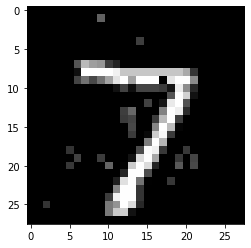

迭代: 35
置信度： 0.964364


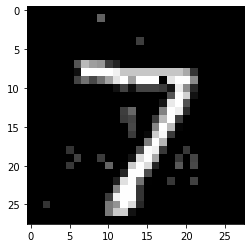

迭代: 36
置信度： 0.96375453


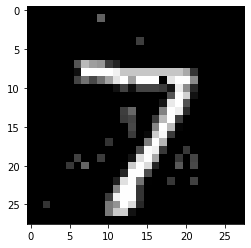

迭代: 37
置信度： 0.96364516


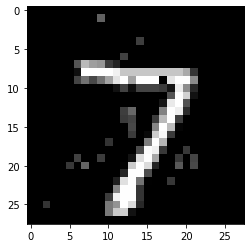

迭代: 38
置信度： 0.96289045


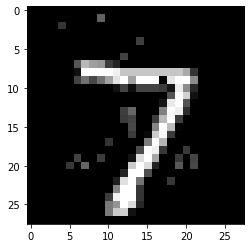

迭代: 39
置信度： 0.9628879


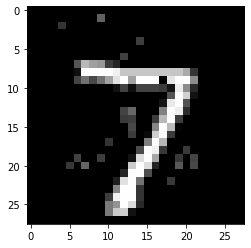

迭代: 40
置信度： 0.9628303


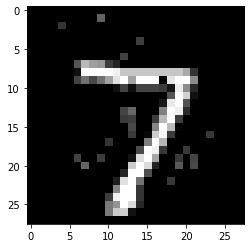

迭代: 41
置信度： 0.9615608


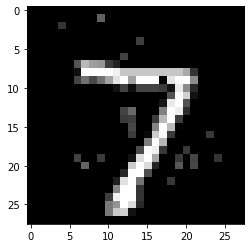

迭代: 42
置信度： 0.96146685


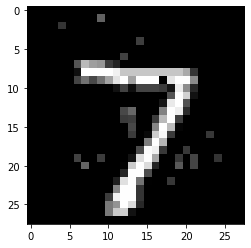

迭代: 43
置信度： 0.96072656


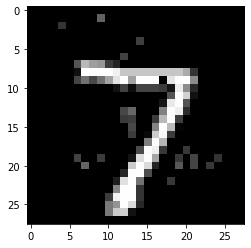

迭代: 44
置信度： 0.9599164


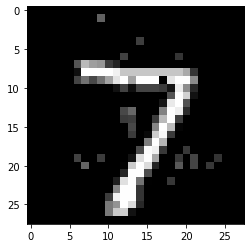

迭代: 45
置信度： 0.9598482


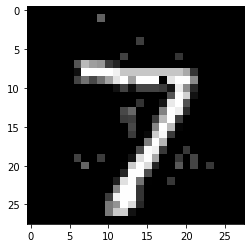

迭代: 46
置信度： 0.95877993


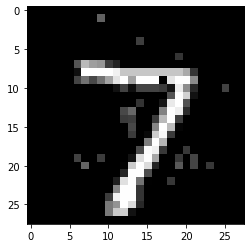

迭代: 47
置信度： 0.9587698


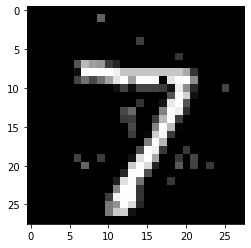

迭代: 48
置信度： 0.9587355


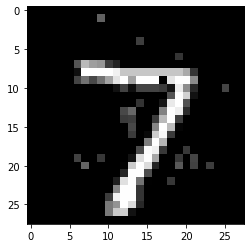

迭代: 49
置信度： 0.95840997


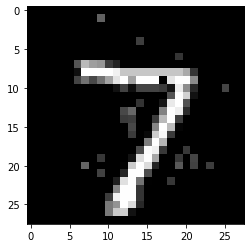

迭代: 50
置信度： 0.95778286


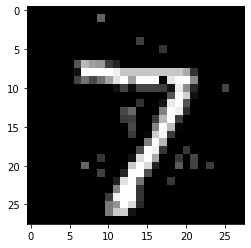

迭代: 51
置信度： 0.9575698


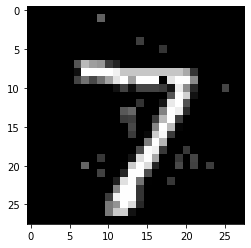

迭代: 52
置信度： 0.9566317


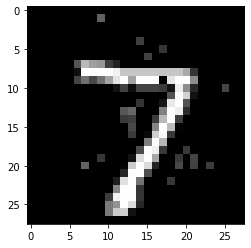

迭代: 53
置信度： 0.9566103


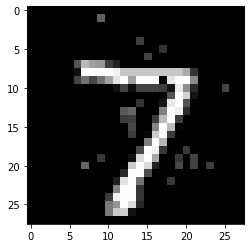

迭代: 54
置信度： 0.9565807


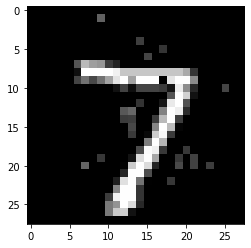

迭代: 55
置信度： 0.95627534


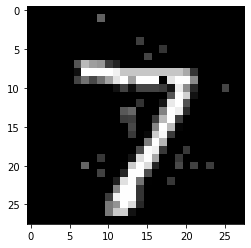

迭代: 56
置信度： 0.9561672


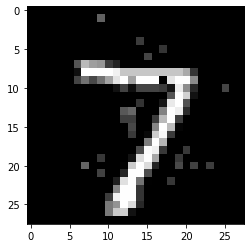

迭代: 57
置信度： 0.9560051


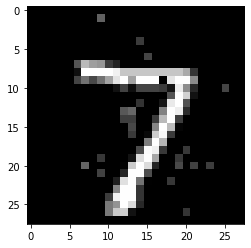

迭代: 58
置信度： 0.95511067


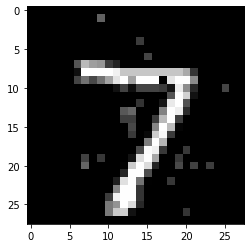

迭代: 59
置信度： 0.9551095


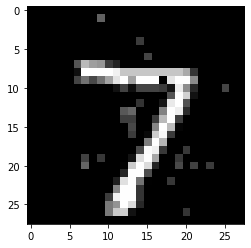

迭代: 60
置信度： 0.95499855


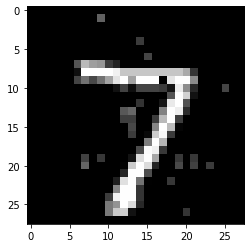

迭代: 61
置信度： 0.95457655


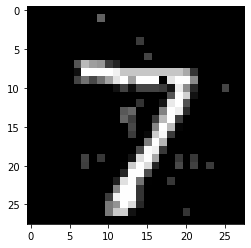

迭代: 62
置信度： 0.95457375


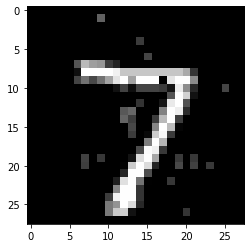

迭代: 63
置信度： 0.9544304


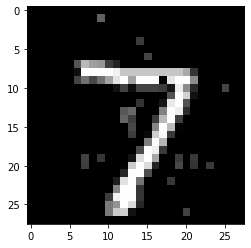

迭代: 64
置信度： 0.95441353


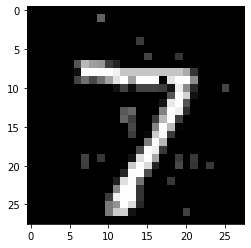

迭代: 65
置信度： 0.9533092


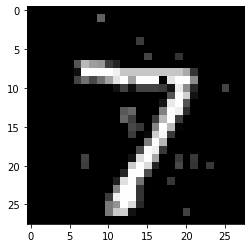

迭代: 66
置信度： 0.9531264


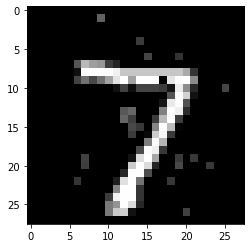

迭代: 67
置信度： 0.95309335


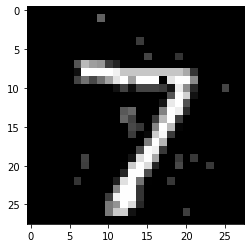

迭代: 68
置信度： 0.95304275


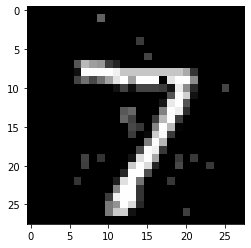

迭代: 69
置信度： 0.9524975


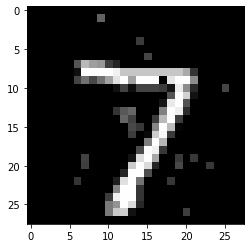

迭代: 70
置信度： 0.9524574


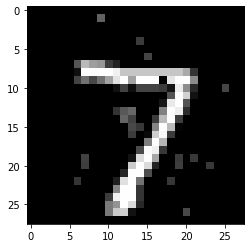

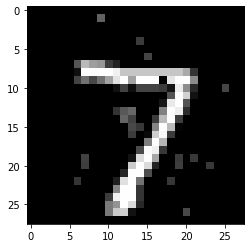

最终置信度： 0.9524574
[7.2493730e-04 2.7936138e-04 1.1653425e-02 2.8205730e-02 9.1596834e-05
 1.9660459e-03 7.8495041e-06 9.5245743e-01 1.2388444e-03 3.3748341e-03]


In [24]:
# 改变坐标减小置信度1
import copy
x_t = copy.deepcopy(x_f)
count = 0
for t in range(70):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        #print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

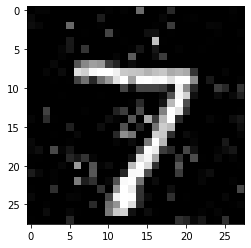

置信度： 0.8537802
[1.0513775e-03 5.3630478e-04 3.5179295e-02 1.0053520e-01 8.5225554e-05
 3.0257374e-03 8.7440330e-06 8.5378021e-01 2.8766976e-03 2.9212660e-03]


In [31]:
#过滤2
import copy
x_f_2 = copy.deepcopy(BEST_X_2)
for i in range(784):
    if abs(x_f_2[i]) > 0.8:
        x_f_2[i] = 0
f2 = x_f_2+x_test[0]/255
plt.imshow(f2.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f2.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

迭代: 1
置信度： 0.8535697


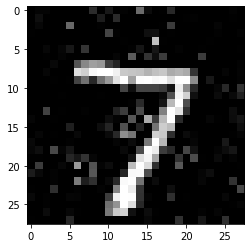

迭代: 2
置信度： 0.8446815


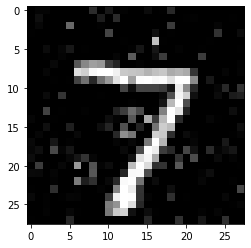

迭代: 3
置信度： 0.84358376


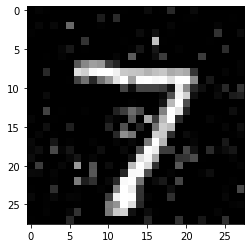

迭代: 4
置信度： 0.8435497


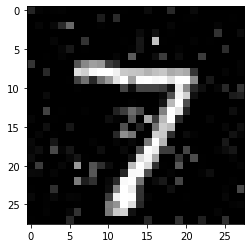

迭代: 5
置信度： 0.84154713


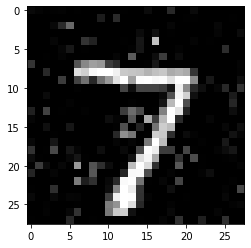

迭代: 6
置信度： 0.8380946


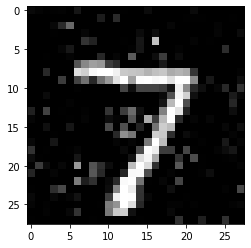

迭代: 7
置信度： 0.8365527


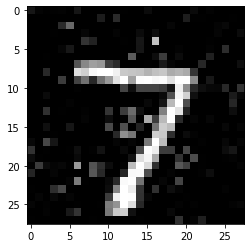

迭代: 8
置信度： 0.83020437


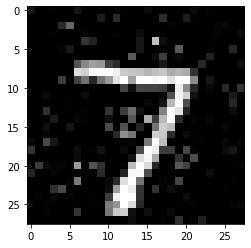

迭代: 9
置信度： 0.8203402


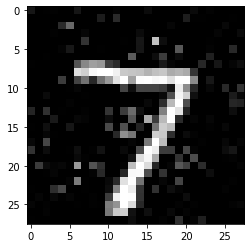

迭代: 10
置信度： 0.80992424


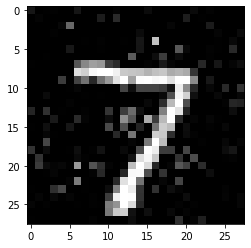

迭代: 11
置信度： 0.80799264


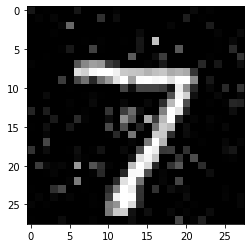

迭代: 12
置信度： 0.8068855


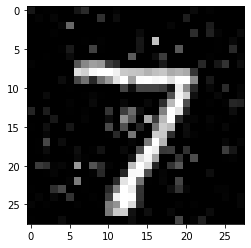

迭代: 13
置信度： 0.7981055


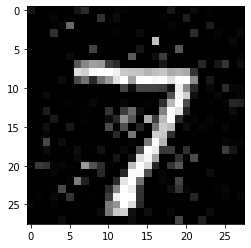

迭代: 14
置信度： 0.7956021


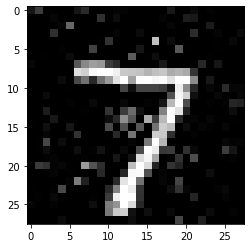

迭代: 15
置信度： 0.7928216


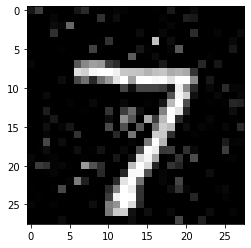

迭代: 16
置信度： 0.77972347


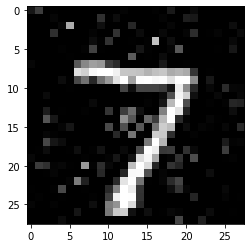

迭代: 17
置信度： 0.77755094


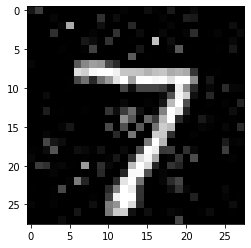

迭代: 18
置信度： 0.77451664


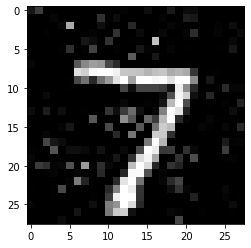

迭代: 19
置信度： 0.76584095


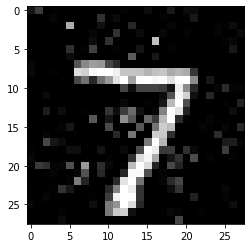

迭代: 20
置信度： 0.76513493


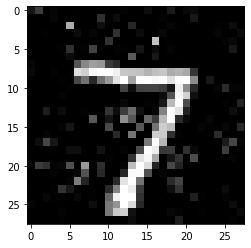

迭代: 21
置信度： 0.7590959


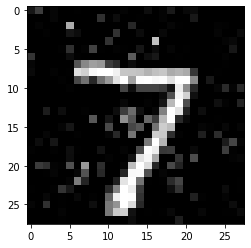

迭代: 22
置信度： 0.75655293


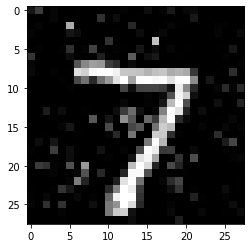

迭代: 23
置信度： 0.7492566


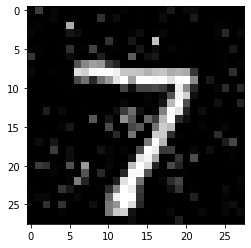

迭代: 24
置信度： 0.74895465


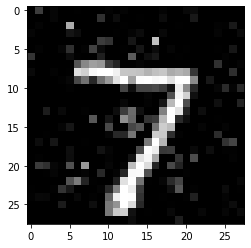

迭代: 25
置信度： 0.7461156


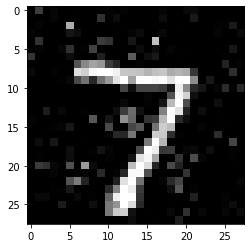

迭代: 26
置信度： 0.73577726


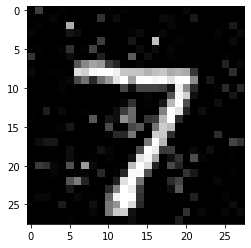

迭代: 27
置信度： 0.73512024


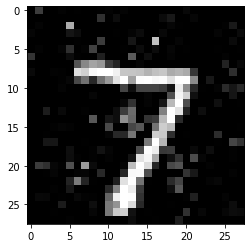

迭代: 28
置信度： 0.72438216


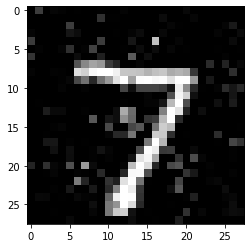

迭代: 29
置信度： 0.7219071


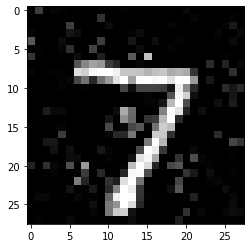

迭代: 30
置信度： 0.7190014


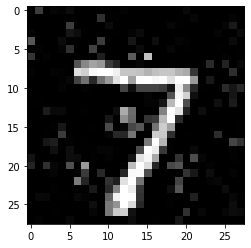

迭代: 31
置信度： 0.71731544


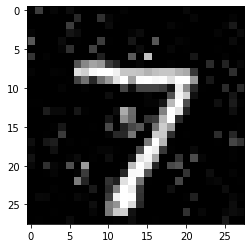

迭代: 32
置信度： 0.69913095


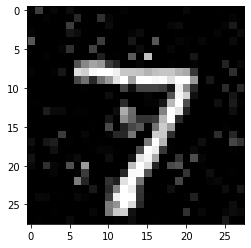

迭代: 33
置信度： 0.6984667


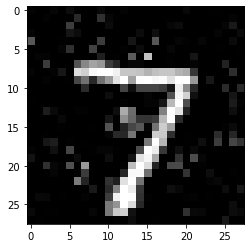

迭代: 34
置信度： 0.6786285


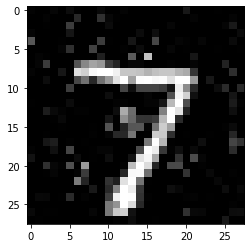

迭代: 35
置信度： 0.67340916


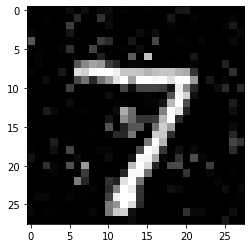

迭代: 36
置信度： 0.66891897


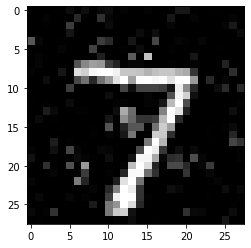

迭代: 37
置信度： 0.6661174


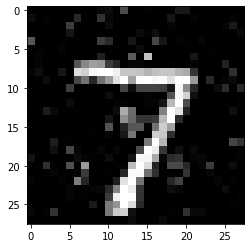

迭代: 38
置信度： 0.6651739


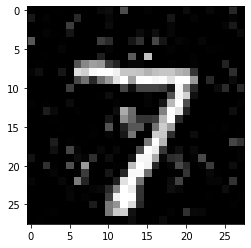

迭代: 39
置信度： 0.6632795


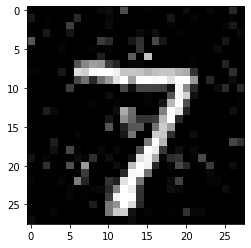

迭代: 40
置信度： 0.6526833


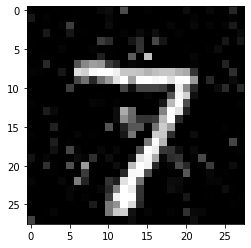

迭代失败


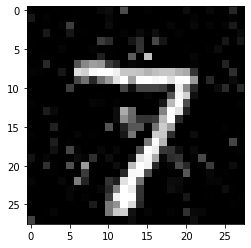

最终置信度： 0.6526833
[2.2504693e-03 8.8272925e-04 7.1041144e-02 2.5553343e-01 1.3413510e-04
 6.9456408e-03 1.9345236e-05 6.5268332e-01 5.8557005e-03 4.6541016e-03]


In [32]:
# 改变坐标减小置信度2
import copy
x_t = copy.deepcopy(x_f_2)
count = 0
for t in range(70):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        #print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

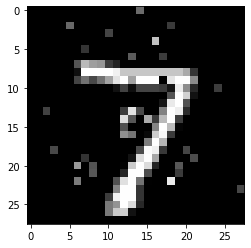

置信度： 0.7907672
[1.0473775e-03 7.3153462e-04 4.0878057e-02 1.5099204e-01 1.5565686e-04
 4.9336604e-03 1.6167432e-05 7.9076719e-01 5.3205844e-03 5.1576914e-03]


In [8]:
#过滤2_
import copy
x_f_2 = copy.deepcopy(BEST_X_2)
for i in range(784):
    if abs(x_f_2[i]) < 0.2:
        x_f_2[i] = 0
f2 = x_f_2+x_test[0]/255
plt.imshow(f2.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f2.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

迭代: 1
置信度： 0.7886838


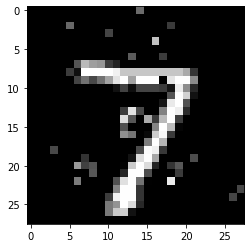

迭代: 2
置信度： 0.7819173


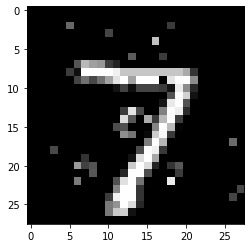

迭代: 3
置信度： 0.7748914


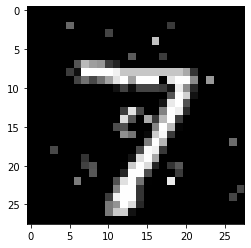

迭代: 4
置信度： 0.76968175


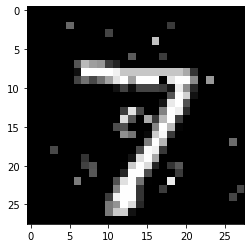

迭代: 5
置信度： 0.762797


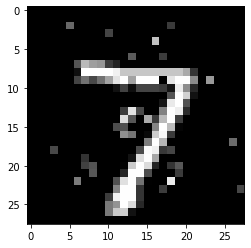

迭代: 6
置信度： 0.7590493


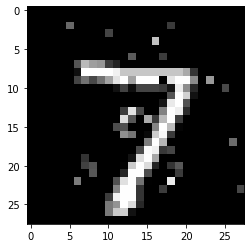

迭代: 7
置信度： 0.7448352


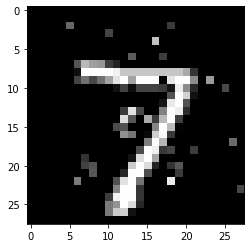

迭代: 8
置信度： 0.7438663


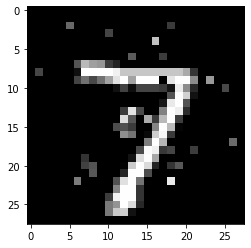

迭代: 9
置信度： 0.7382487


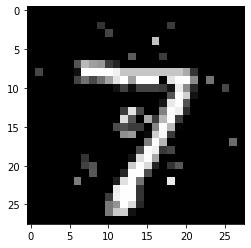

迭代: 10
置信度： 0.7357529


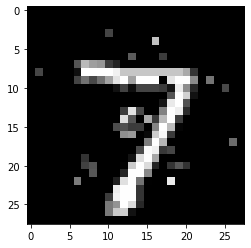

迭代: 11
置信度： 0.732362


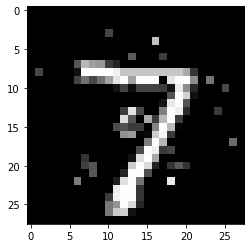

迭代: 12
置信度： 0.7322976


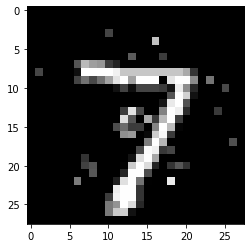

迭代: 13
置信度： 0.72811186


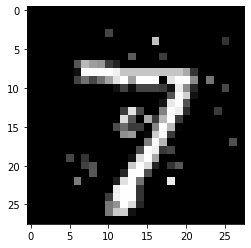

迭代: 14
置信度： 0.7226395


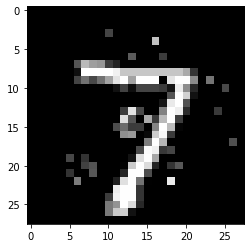

迭代: 15
置信度： 0.71840215


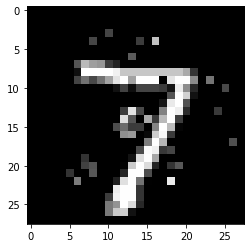

迭代: 16
置信度： 0.70110726


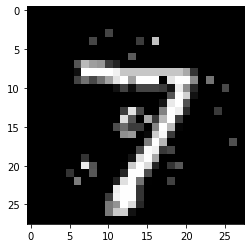

迭代: 17
置信度： 0.69296193


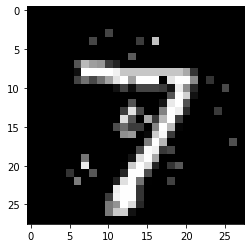

迭代: 18
置信度： 0.6888222


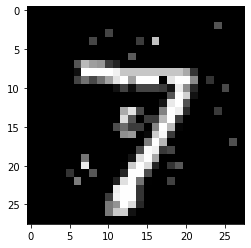

迭代: 19
置信度： 0.6759154


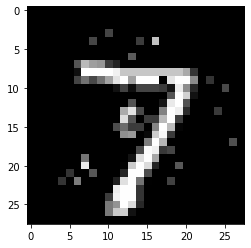

迭代: 20
置信度： 0.6748356


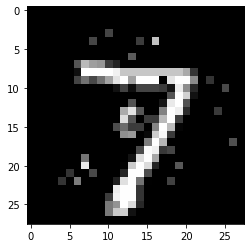

迭代: 21
置信度： 0.66731966


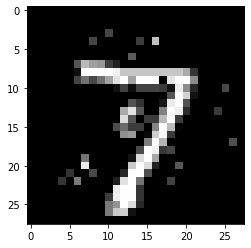

迭代: 22
置信度： 0.65848863


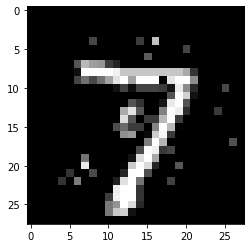

迭代: 23
置信度： 0.649467


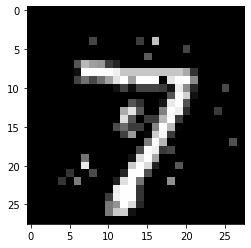

迭代: 24
置信度： 0.64344096


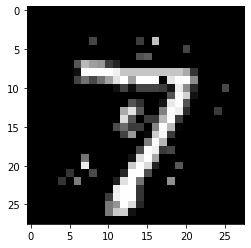

迭代: 25
置信度： 0.64055747


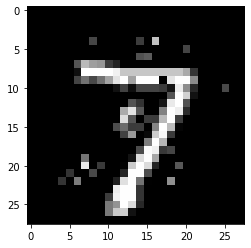

迭代: 26
置信度： 0.63719386


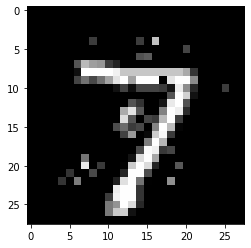

迭代: 27
置信度： 0.636704


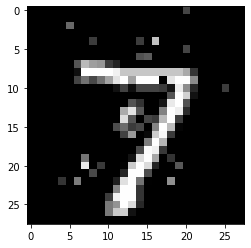

迭代: 28
置信度： 0.6342698


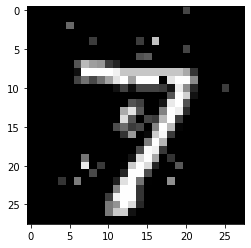

迭代: 29
置信度： 0.62928355


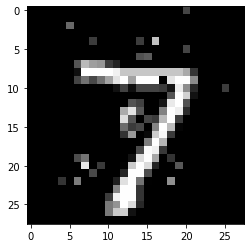

迭代: 30
置信度： 0.6205578


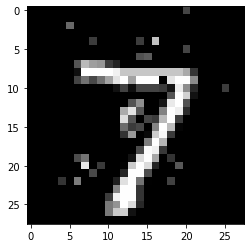

迭代: 31
置信度： 0.6155478


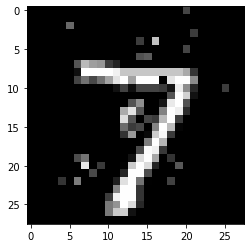

迭代: 32
置信度： 0.6116142


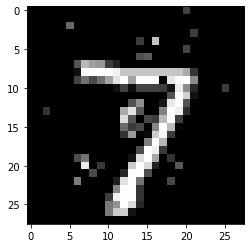

迭代: 33
置信度： 0.6072935


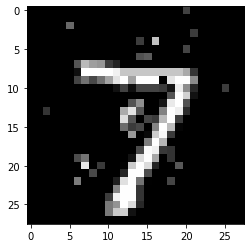

迭代: 34
置信度： 0.6061798


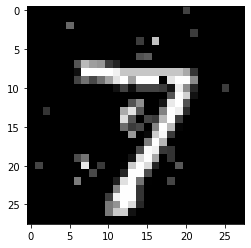

迭代: 35
置信度： 0.6013325


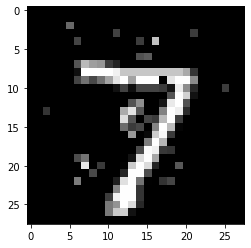

迭代: 36
置信度： 0.5924116


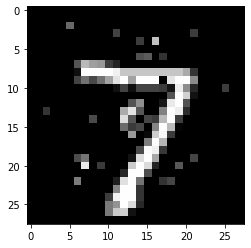

迭代: 37
置信度： 0.5634282


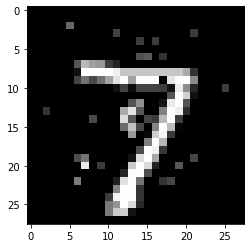

迭代: 38
置信度： 0.5557606


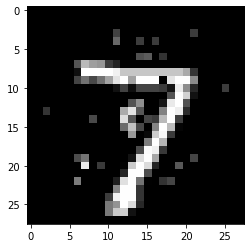

迭代: 39
置信度： 0.54182065


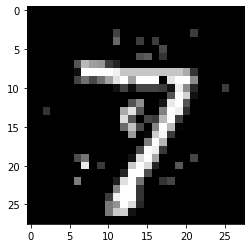

迭代: 40
置信度： 0.54080814


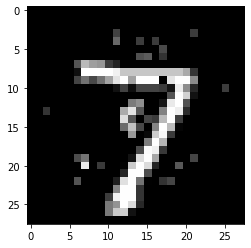

迭代: 41
置信度： 0.53578544


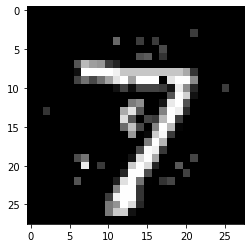

迭代: 42
置信度： 0.5303042


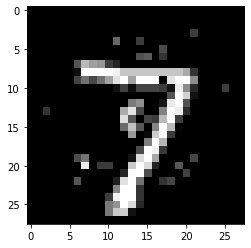

迭代: 43
置信度： 0.5249146


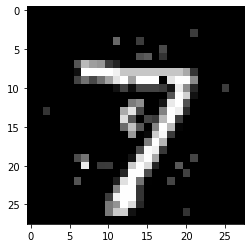

迭代: 44
置信度： 0.5214863


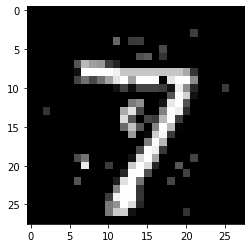

迭代: 45
置信度： 0.5207095


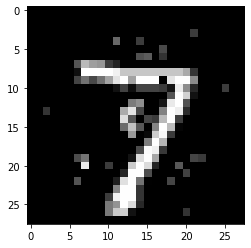

迭代: 46
置信度： 0.5206278


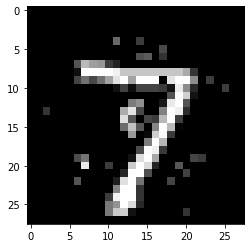

迭代: 47
置信度： 0.51749295


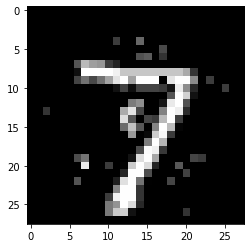

迭代: 48
置信度： 0.51436716


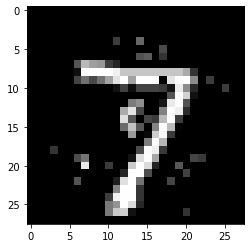

迭代: 49
置信度： 0.508491


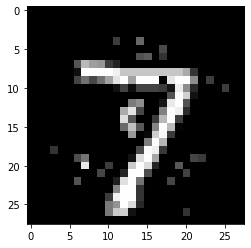

迭代: 50
置信度： 0.5076996


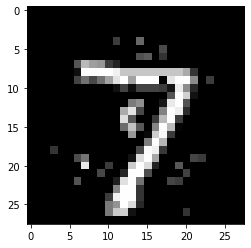

迭代: 51
置信度： 0.5076213


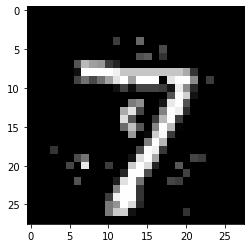

迭代: 52
置信度： 0.50410193


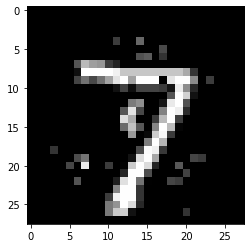

迭代: 53
置信度： 0.5020685


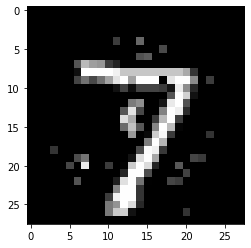

迭代: 54
置信度： 0.50182265


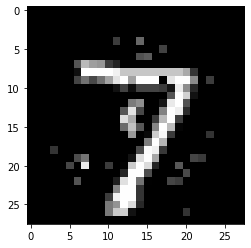

迭代: 55
置信度： 0.50179696


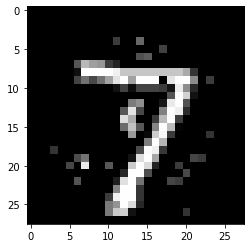

迭代: 56
置信度： 0.4957663


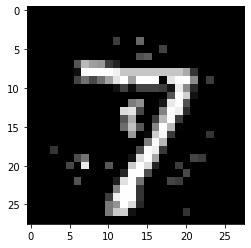

迭代: 57
置信度： 0.49575582


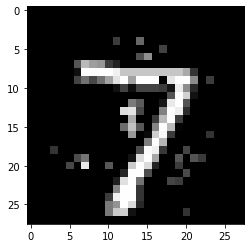

迭代: 58
置信度： 0.49505144


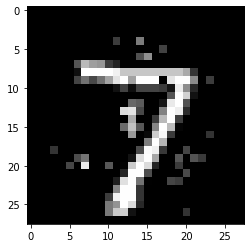

迭代: 59
置信度： 0.4939064


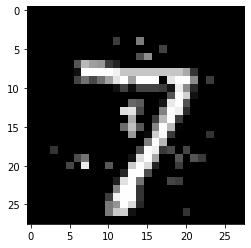

迭代: 60
置信度： 0.48816267


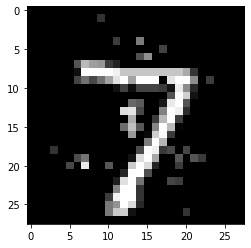

迭代: 61
置信度： 0.4879689


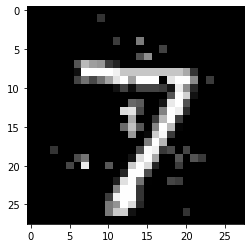

迭代: 62
置信度： 0.4847679


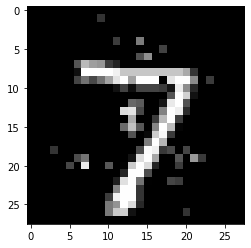

迭代: 63
置信度： 0.48260614


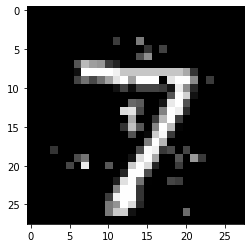

迭代: 64
置信度： 0.48186418


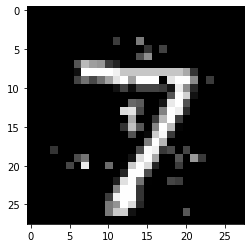

迭代: 65
置信度： 0.47814748


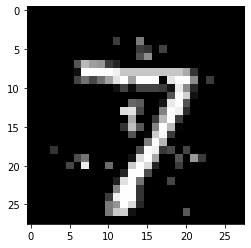

迭代: 66
置信度： 0.47256047


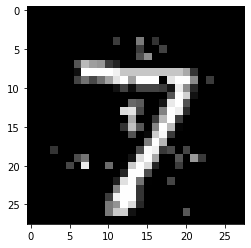

迭代: 67
置信度： 0.46767798


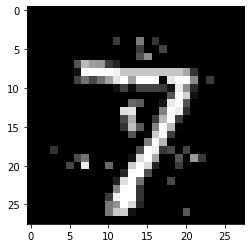

迭代: 68
置信度： 0.46671402


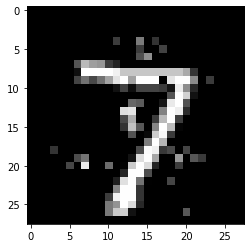

迭代: 69
置信度： 0.46599302


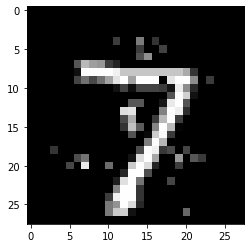

迭代: 70
置信度： 0.46462405


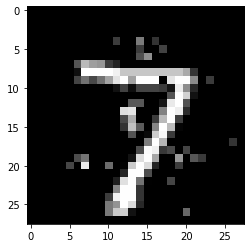

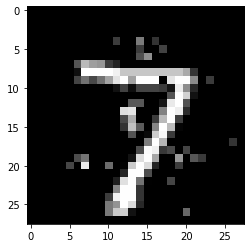

最终置信度： 0.46462405
[2.4469597e-03 1.6951534e-03 7.2452091e-02 4.2183900e-01 1.6249744e-04
 1.4860434e-02 3.3395598e-05 4.6462405e-01 1.4721367e-02 7.1650180e-03]


In [9]:
# 改变坐标减小置信度2_
import copy
x_t = copy.deepcopy(x_f_2)
count = 0
for t in range(70):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        #print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

In [14]:
x_t

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.690092868,
 0,
 0.391728007,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.907742653,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.711585656,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [13]:
#test
count = 0
for i in range(784):
    if x_t[i] != 0:
        count+=1
print(count)

26


0


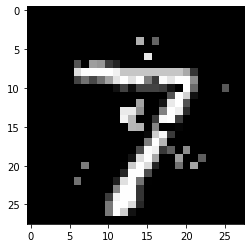

2


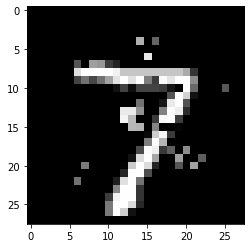

3


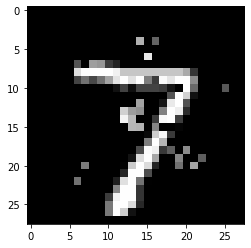

2


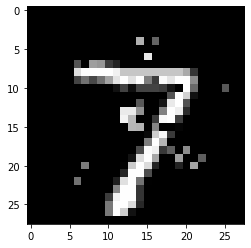

2


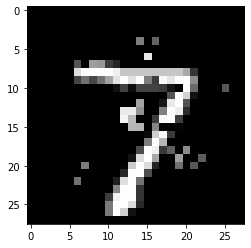

3


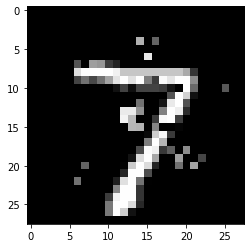

2


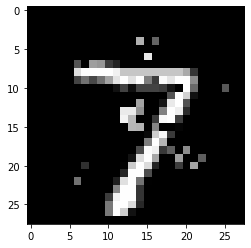

3


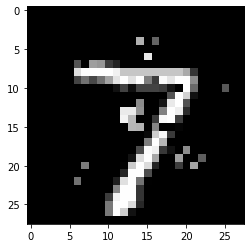

3


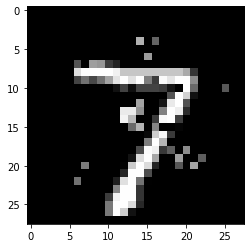

3


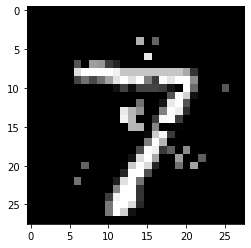

3


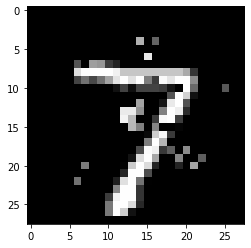

3


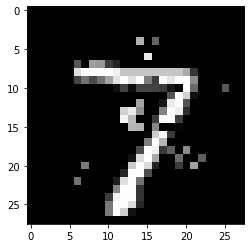

1


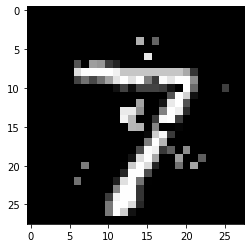

3


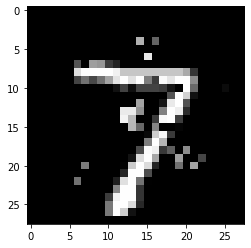

3


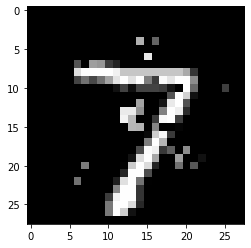

1


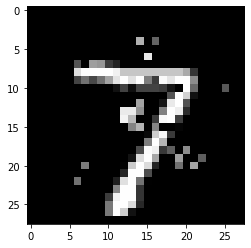

1


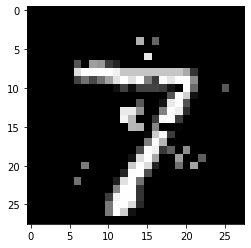

2


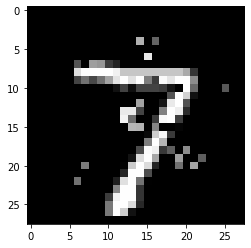

4


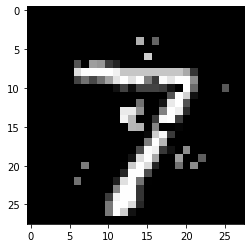

1


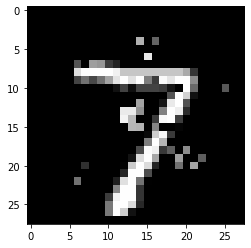

2


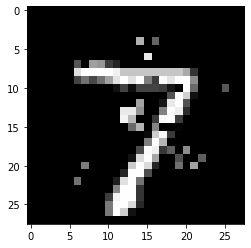

2


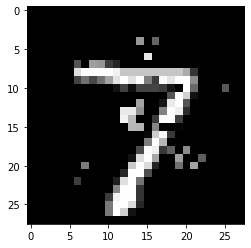

1


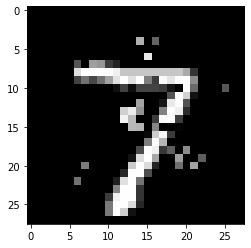

1


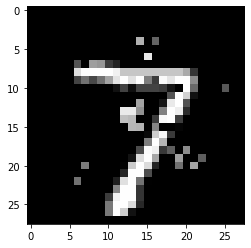

2


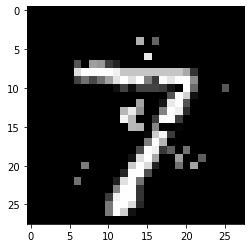

0


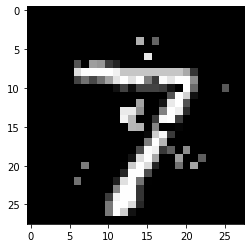

4


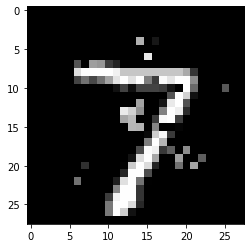

1


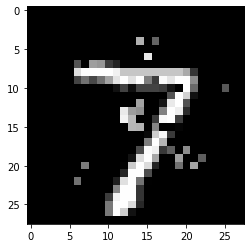

2


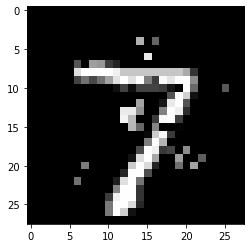

4


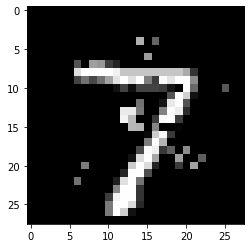

4


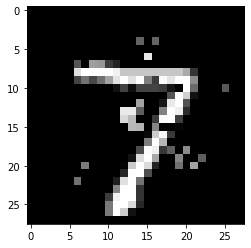

5


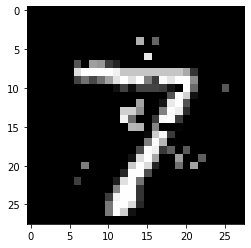

0


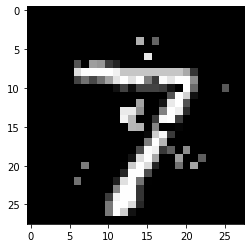

1


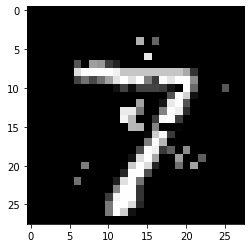

2


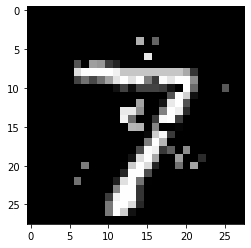

1


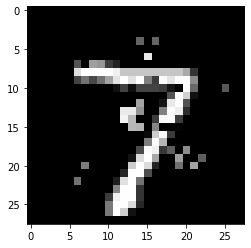

2


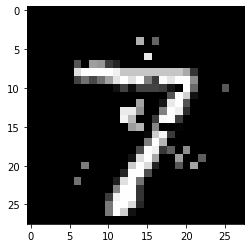

5


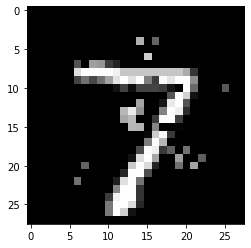

4


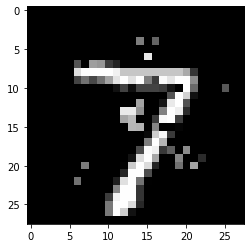

1


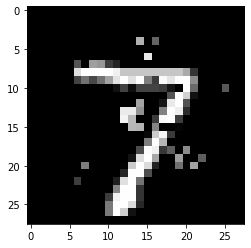

1


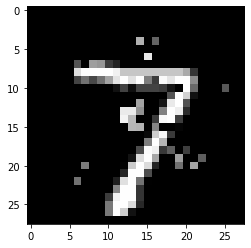

2


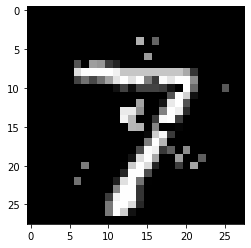

5


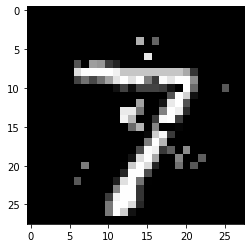

0


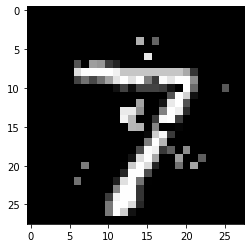

4


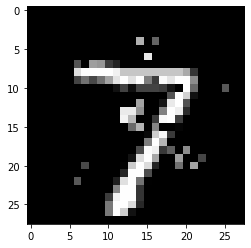

1


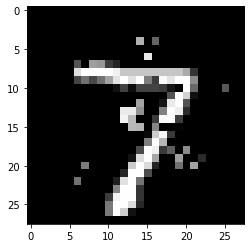

2


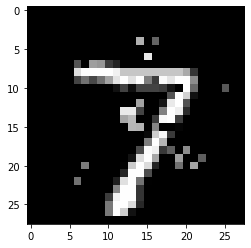

3


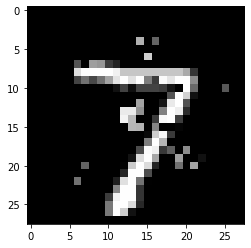

3


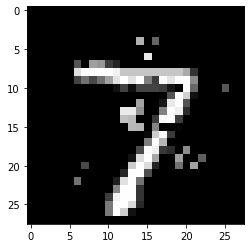

3


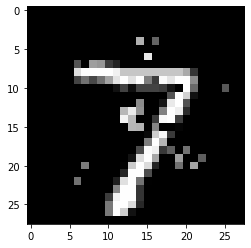

In [15]:
# 种群再次生成
import copy
x_t = np.array(x_t)
x_tmp_f = copy.deepcopy(x_t)
x_des_f = []
for r in range(50):
    count = 0
    for k in range(784):
        if x_t[k] > 0.3:
            x = random.randint(0,10000)/10000
            if x <= 0.1:
                x_tmp_f[k] -= random.randint(1,3)/10
                count += 1
    print(count)
    x_des_f.append(np.array(x_tmp_f.reshape(1,784)))
    x_re = x_tmp_f+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp_f = copy.deepcopy(x_t)

最优值： 0.41977897 扰动程度 11.112642312431678
最优值： 0.43867067 扰动程度 10.893476349031678
最优值： 0.44884822 扰动程度 10.804284616045678
最优值： 0.48181194 扰动程度 10.558789857077878
最优值： 0.47482413 扰动程度 10.470090405958677
最优值： 0.47513294 扰动程度 10.359598973165077
最优值： 0.4897499 扰动程度 10.239576839640877
最优值： 0.48216838 扰动程度 10.164069852661042
最优值： 0.4983018 扰动程度 10.290333272694456
最优值： 0.49225414 扰动程度 10.137203167376406
最优值： 0.52998495 扰动程度 10.046818775093762
最优值： 0.50923765 扰动程度 10.22897984937272
最优值： 0.5423002 扰动程度 9.996330216522631
最优值： 0.5163958 扰动程度 10.17794942920692
最优值： 0.5669278 扰动程度 9.79720697944783
最优值： 0.5163958 扰动程度 10.17794942920692
最优值： 0.5163958 扰动程度 10.17794942920692
最优值： 0.52088666 扰动程度 10.091866960046248
最优值： 0.5233194 扰动程度 10.06915561994532
最优值： 0.5233194 扰动程度 10.06915561994532
最优值： 0.55756956 扰动程度 9.69100211730985
最优值： 0.5446483 扰动程度 9.9325012403763
最优值： 0.5318175 扰动程度 9.86224900264691
最优值： 0.5318175 扰动程度 9.86224900264691
最优值： 0.58997625 扰动程度 9.58016480098651
最优值： 0.5031075 扰动程度 10.072630569

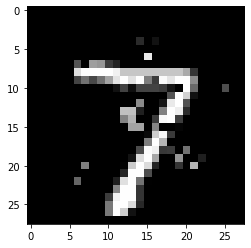

In [16]:
#限制上限
MAX_GENERATION = 100  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X_F = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des_f, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X_F = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X_F + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if Func(BEST_X_F) < 0.5:
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X_F):
                            BEST_X_F = U[i, :]
                    elif Func(BEST_X_F) >= 0.5:
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if FITS_U[i] < Func(BEST_X_F):
                            BEST_X_F = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X_F),"扰动程度",Dis(BEST_X_F))
        if GENERATION == MAX_GENERATION:
            BEST_F = BEST_X_F+x_test[0]/255
            #print(BEST_X_F)
            plt.imshow(BEST_F.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.38789693 扰动程度 11.142017347675877
最优值： 0.4524267 扰动程度 10.655480791941878
最优值： 0.4573378 扰动程度 10.518971750361969
最优值： 0.4818415 扰动程度 10.354261040213164
最优值： 0.49801108 扰动程度 10.327181827294224
最优值： 0.52929765 扰动程度 10.114869984801258
最优值： 0.51552755 扰动程度 10.051394670971009
最优值： 0.5556319 扰动程度 9.931890267112788
最优值： 0.5892692 扰动程度 9.622530533262365
最优值： 0.60072464 扰动程度 9.413839932480034
最优值： 0.59792894 扰动程度 9.478493851294848
最优值： 0.59840107 扰动程度 9.433747620698986
最优值： 0.6124618 扰动程度 9.373888379389381
最优值： 0.6297756 扰动程度 9.203169300921905
最优值： 0.6538059 扰动程度 8.98923272216915
最优值： 0.6475034 扰动程度 9.03251590811511
最优值： 0.6816846 扰动程度 8.758635096380138
最优值： 0.726672 扰动程度 8.54457423615095
最优值： 0.7511848 扰动程度 8.355425445596953
最优值： 0.7468807 扰动程度 8.363151502293455
最优值： 0.76651317 扰动程度 8.289576299872174
最优值： 0.74468595 扰动程度 8.27318017613064
最优值： 0.7406927 扰动程度 8.27042222279117
最优值： 0.76799285 扰动程度 8.238549316778512
最优值： 0.7840768 扰动程度 8.064835890419733
最优值： 0.8012576 扰动程度 7.85701074446101
最优

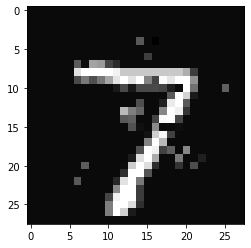

In [19]:
#不限制置信度
MAX_GENERATION = 50 # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X_f = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des_f, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X_f = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X_f + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X_f):
                        BEST_X_f = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X_f),"扰动程度",Dis(BEST_X_f))
        if GENERATION == MAX_GENERATION:
            BEST_f = BEST_X_f+x_test[0]/255
            print(BEST_X_f)
            plt.imshow(BEST_f.reshape(28,28),cmap='gray')
            plt.show()
            break

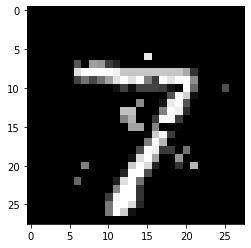

置信度： 0.69462633
[1.8597036e-03 1.5763026e-03 3.1549066e-02 2.3895071e-01 1.8572895e-04
 1.1609471e-02 2.7825794e-05 6.9462633e-01 1.1367793e-02 8.2471725e-03]


In [23]:
#过滤1
import copy
x_F = copy.deepcopy(BEST_X_F)
for i in range(784):
    if abs(x_F[i]) < 0.2:
        x_F[i] = 0
F = x_F+x_test[0]/255
plt.imshow(F.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(F.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

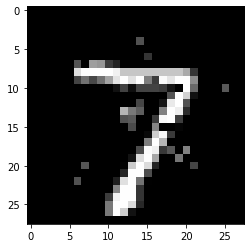

置信度： 0.9325705
[1.1530070e-03 5.6592957e-04 9.9069644e-03 4.5109455e-02 1.0532384e-04
 4.4090031e-03 1.3827292e-05 9.3257052e-01 2.5130177e-03 3.6529198e-03]


In [21]:
#过滤2
import copy
x_F2 = copy.deepcopy(BEST_X_f)
for i in range(784):
    if abs(x_F2[i]) < 0.2:
        x_F2[i] = 0
F2 = x_F2+x_test[0]/255
plt.imshow(F2.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(F2.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

0.75077105
0.69462633
0.69462633
0.7953799
0.8325697
0.75255543
0.69462633
0.8410859
0.7910733
0.7945233
0.7900236
0.69462633
0.69462633
0.85084105
0.8819843
0.79531974
0.8293504
0.6988146
0.8840773
0.77279747
0.74209976
0.83663183
0.78311604
0.69462633
0.7651619
0.75148356
0.74527544
0.8428315
0.78202415
0.7661907
0.8263316
0.69462633
0.715297
0.718346
0.76266724
0.7011862
0.74151915
0.87145585
0.7856859
0.8382072
0.7705562
0.7814709
0.7732611
0.7919463
0.79482675
0.69462633
0.70893586
0.8248733
0.7862484
0.7592274
0.76511294
0.75579417
0.7770808
0.69462633
0.77500516
0.8412209
0.7148569
0.83099437
0.72945696
0.77512395
0.69462633
0.7747121
0.7967693
0.8686309
0.77546686
0.81392854
0.7330013
0.69462633
0.79005164
0.7895448
0.7436256
0.8446891
0.80291563
0.69462633
0.69462633
0.8843282
0.69462633
0.7578114
0.83849925
0.72144973
0.7694442
0.84823585
0.74423313
0.83947134
0.74196494
0.69462633
0.75496846
0.7698441
0.80431443
0.73626596
0.8278528
0.80989426
0.7887984
0.7284002
0.7575865
0

0.7705786
0.77642995
0.89431524
0.7804226
0.7148122
0.75139344
0.7866254
0.69462633
0.80890244
0.8653891
0.7528345
0.7547811
0.7479452
0.69462633
0.7628208
0.84718925
0.8813358
0.93510216
0.8629191
0.7610021
0.77876896
0.75897545
0.86452574
0.8278614
0.7861848
0.7616657
0.72707313
0.69462633
0.69462633
0.81433326
0.8527684
0.7580969
0.7223159
0.8359458
0.75023925
0.84583503
0.8285027
0.69462633
0.7868442
0.85838914
0.80502564
0.7455253
0.7513826
0.7956469
0.69462633
0.83651614
0.71068335
0.7860249
0.8592657
0.8105369
0.7765806
0.7498281
0.759216
0.69462633
0.7773006
0.7460371
0.69462633
0.7716465
0.7436767
0.77784556
0.80585545
0.69462633
0.7396577
0.83756423
0.8327372
0.69462633
0.8405275
0.7330013
0.8413516
0.7053801
0.8810023
0.7639974
0.8301582
0.74172646
0.7219247
0.69462633
0.8538721
0.78343004
0.7514186
0.7081803
0.8977181
0.7744811
0.80008286
0.79487324
0.8081842
0.7338399
0.7667284
0.7373625
0.744943
0.7663968
0.7935436
0.69462633
0.87725806
0.7720099
0.69462633
0.7477043
0.75

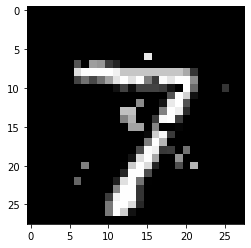

0.6935853
0.7808573
0.86172426
0.7521557
0.6935853
0.80594796
0.7786542
0.7708969
0.8334817
0.7115853
0.8061338
0.74057645
0.73637664
0.7208626
0.7472746
0.8672146
0.6935853
0.8173761
0.80077314
0.7722858
0.72720224
0.77896094
0.6935853
0.6935853
0.9060505
0.86275446
0.822338
0.8611954
0.7497642
0.79428107
0.7948079
0.8894043
0.75742435
0.75258017
0.7718977
0.6935853
0.7516427
0.78006643
0.79538476
0.80598676
0.8454095
0.8099449
0.73069805
0.6935853
0.7089368
0.7998776
0.80559915
0.75005966
0.79530317
0.7573865
0.73670465
0.71500766
0.791813
0.790791
0.69674826
0.7984384
0.80610967
0.77844554
0.6935853
0.6935853
0.6935853
0.789312
0.6935853
0.6935853
0.7979086
0.7441551
0.7132521
0.6935853
0.7791767
0.7985633
0.7468624
0.85552645
0.7591405
0.754386
0.88468987
0.7571542
0.6935853
0.7188369
0.8671409
0.79093945
0.888076
0.7797979
0.6935853
0.811111
0.6935853
0.704735
0.77082336
0.805276
0.71484023
0.84386975
0.8907491
0.7237965
0.6935853
0.7633714
0.7237986
0.81190807
0.6935853
0.7831823

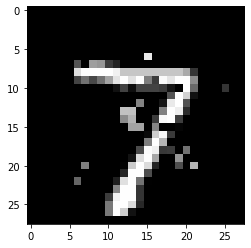

0.87140614
0.7715974
0.7263034
0.6933938
0.78054196
0.7456155
0.854232
0.6933938
0.7366821
0.74787045
0.6933938
0.6933938
0.88239646
0.7653364
0.87352324
0.80685467
0.8267215
0.81011057
0.8282528
0.6933938
0.6933938
0.77002215
0.6933938
0.7398104
0.7993936
0.71385914
0.8453667
0.8700953
0.8280438
0.6933938
0.8207181
0.8501633
0.74347323
0.75084984
0.7844689
0.8437449
0.6933938
0.75770676
0.84000814
0.86711055
0.7622295
0.7799457
0.70799404
0.84863967
0.6933938
0.74872047
0.71732295
0.93420166
0.90685546
0.9163008
0.73872477
0.7226928
0.6933938
0.83342826
0.77379644
0.6933938
0.6933938
0.7738075
0.7271933
0.8689358
0.85306907
0.6933938
0.8116763
0.8472649
0.8117607
0.70778733
0.69871354
0.89125776
0.8040087
0.7723946
0.7930251
0.7528083
0.819104
0.7404666
0.8846822
0.7740337
0.7782687
0.7138658
0.6933938
0.80394506
0.7768138
0.82335943
0.74857074
0.7359297
0.70585006
0.7517523
0.8011047
0.80006754
0.8740713
0.79757315
0.7571163
0.77167284
0.8913424
0.8449981
0.7437368
0.77547604
0.69339

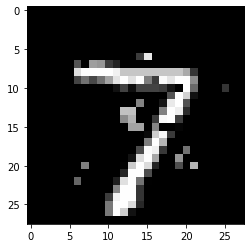

0.68734527
0.77873135
0.72729814
0.77793425
0.8389782
0.82768154
0.726334
0.68734527
0.8023333
0.68734527
0.71443605
0.88353235
0.7945279
0.7558899
0.7760111
0.8192063
0.8346704
0.7446936
0.81484836
0.77922046
0.68734527
0.76973903
0.7738368
0.85373056
0.68734527
0.68734527
0.789326
0.73169523
0.7225161
0.83955073
0.69467396
0.72045386
0.68734527
0.83281827
0.73535866
0.8599389
0.7854372
0.68734527
0.7496799
0.7510252
0.8666691
0.89420426
0.73482525
0.8346197
0.68734527
0.7044677
0.7599643
0.84464526
0.8722072
0.68734527
0.8455896
0.7707467
0.78438085
0.7775776
0.7879544
0.7774475
0.68734527
0.7284231
0.74775046
0.68734527
0.76218593
0.75721365
0.8437893
0.8444969
0.7539635
0.8332478
0.81600267
0.75246245
0.68734527
0.72009116
0.71253437
0.7961906
0.7705706
0.7362702
0.78540385
0.83975303
0.7980805
0.739339
0.7938809
0.7831435
0.68734527
0.68734527
0.7650044
0.7933761
0.7350146
0.742638
0.82701266
0.68734527
0.68734527
0.7791304
0.8377297
0.7512723
0.82744473
0.7307995
0.742646
0.88653

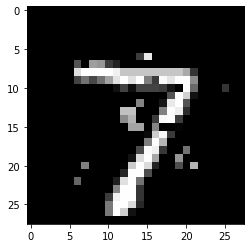

0.6868892
0.8787526
0.8070685
0.6868892
0.7710608
0.8498645
0.83925027
0.6868892
0.7834836
0.7889062
0.7966742
0.69339055
0.879573
0.8739689
0.83519536
0.8494118
0.8584288
0.8071012
0.83988065
0.7931146
0.72521186
0.88413084
0.6868892
0.8902797
0.768019
0.6868892
0.8080747
0.7997926
0.6868892
0.8357486
0.84554005
0.8112176
0.7641419
0.8255318
0.6868892
0.82749885
0.7340458
0.7155661
0.70395726
0.7222903
0.776303
0.78152925
0.7573982
0.69206196
0.72621477
0.6928998
0.77741414
0.7941422
0.6868892
0.6868892
0.7040419
0.6868892
0.7763023
0.71023184
0.8682082
0.7853988
0.69454765
0.8367609
0.7643819
0.80129224
0.81570894
0.92409825
0.700942
0.6868892
0.6868892
0.6868892
0.79392254
0.9180854
0.6868892
0.6868892
0.6868892
0.84312946
0.9273691
0.7635346
0.8151164
0.6868892
0.8391776
0.75615126
0.6868892
0.72823316
0.7773118
0.8226553
0.7779369
0.7818378
0.6868892
0.81850624
0.7168672
0.6868892
0.81405294
0.83414125
0.8226095
0.6868892
0.76738656
0.8826004
0.9021228
0.88288444
0.75670815
0.6868

0.8305183
0.8698168
0.81444836
0.6868892
0.6909569
0.6868892
0.8196971
0.6868892
0.7453432
0.6868892
0.78117007
0.7553188
0.8039356
0.79404783
0.84826183
0.7208526
0.6868892
0.8810173
0.6892653
0.72050405
0.6868892
0.6923543
0.7580278
0.82220924
0.76713806
0.6868892
0.78827846
0.6868892
0.6868892
0.8022092
0.8052395
0.687774
0.74071115
0.8019857
0.74182487
0.6868892
0.6868892
0.83414364
0.6868892
0.8500948
0.73639363
0.85801274
0.6868892
0.8159123
0.80965626
0.7512006
0.782626
0.76617867
0.6868892
0.69214326
0.7558006
0.75247496
0.81147647
0.79846185
0.71124995
0.74358964
0.83128947
0.8045885
0.6868892
0.7216631
0.6868892
0.7767158
0.72790897
0.6868892
0.7839085
0.7049479
0.782548
0.7939394
0.8187099
0.71521664
0.73391527
0.7402911
0.8367113
0.86046433
0.71241575
0.7732808
0.74428153
0.7998323
0.6868892
0.74293834
0.7646323
0.7373811
0.6881478
0.7121509
0.8154216
0.8377125
0.6868892
0.6868892
0.6868892
0.7567475
0.77047
0.79204315
0.7176534
0.82632774
0.8028049
0.6980366
0.7995462
0.70

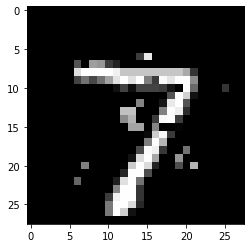

最终置信度： 0.6868892
[1.85399503e-03 1.55466434e-03 3.18095684e-02 2.46235356e-01
 1.80664923e-04 1.11439116e-02 2.64821101e-05 6.86889172e-01
 1.15109375e-02 8.79517011e-03]


In [24]:
# 再次改变坐标减小置信度
x_T = copy.deepcopy(x_F)
count = 0
for t in range(30):
    x_f1 = copy.deepcopy(x_T)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  f_y >= 1.00000000e+00 or f_i >= 1.00000000e+00:
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_T):
            x_T = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_T))
            f1 = x_T+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_T)
    if con == 1000:
        print("迭代失败")
        break
f = x_T+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

0.9516719
0.9476174
0.93499744
0.9410655
0.9325705
0.94946736
0.9734082
0.9502528
0.9325705
0.93698776
0.949978
0.9438299
0.9325705
0.9415964
0.94832253
0.9561504
0.9507222
0.94252384
0.93732953
0.9430041
0.9425469
0.945886
0.96899915
0.9422022
0.95027226
0.9502675
0.9325705
0.95558065
0.93906707
0.95308155
0.93590873
0.9325705
0.9325705
0.9325705
0.94958305
0.94960916
0.9633769
0.9325705
0.95352095
0.9403488
0.9696787
0.9712421
0.9377609
0.95900536
0.9325705
0.9468716
0.93999255
0.9325705
0.93779194
0.9454683
0.95020205
0.9485794
0.9443066
0.95619303
0.9495425
0.9384492
0.93987197
0.9608089
0.94668204
0.9455047
0.9459016
0.94188017
0.9325705
0.941342
0.96667606
0.9325705
0.9405891
0.94837046
0.9325705
0.94223267
0.9619229
0.96176803
0.9562797
0.97227895
0.9325705
0.9325705
0.9325705
0.9325705
0.9325705
0.9464308
0.9404775
0.9438757
0.94584817
0.95548
0.9531528
0.9528922
0.9427843
0.9476864
0.94287264
0.94763947
0.96234596
0.97411186
0.95069206
0.9746967
0.950982
0.96961427
0.9690251
0

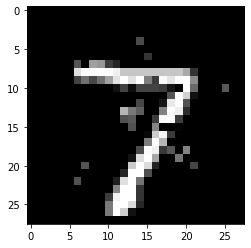

0.9320961
0.9379831
0.9464567
0.96643794
0.950239
0.94295555
0.96063304
0.96397537
0.9320961
0.9487379
0.93714917
0.94976336
0.9557953
0.9320961
0.946752
0.95577526
0.9320961
0.9408013
0.95155025
0.96934533
0.9368426
0.94798476
0.9592075
0.9320961
0.93865263
0.9320961
0.95437163
0.9428737
0.9343403
0.9320961
0.9385592
0.9320961
0.95091945
0.93347824
0.94413805
0.93615395
0.95112157
0.9320961
0.9426467
0.9320961
0.9590509
0.9365203
0.95585346
0.9528929
0.95109385
0.95643836
0.93732166
0.937804
0.9373928
0.9503043
0.9535276
0.9320961
0.93879294
0.9424749
0.9399427
0.93989563
0.97203934
0.94157803
0.9505844
0.9278249
迭代: 2
置信度： 0.9278249


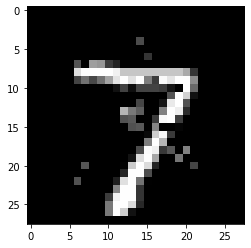

0.9342663
0.95091426
0.93454725
0.9278249
0.9278249
0.95807844
0.9278249
0.95712584
0.94411606
0.937437
0.93122107
0.95282704
0.95378035
0.96507585
0.9458218
0.93470985
0.9498959
0.9380689
0.9585195
0.9318628
0.9551617
0.9278249
0.94151336
0.9542963
0.9482728
0.9650913
0.94759005
0.9575311
0.9278249
0.9278249
0.9363496
0.95357955
0.948444
0.9278249
0.9388268
0.9278249
0.93449414
0.953541
0.9278249
0.9278249
0.95453745
0.9653619
0.9437026
0.9360234
0.9396908
0.9278249
0.9368114
0.9496533
0.93854636
0.9640838
0.9657407
0.9689687
0.9278249
0.9418116
0.95935875
0.942902
0.95963365
0.94009084
0.93449414
0.9483409
0.9278249
0.93857986
0.9272754
迭代: 3
置信度： 0.9272754


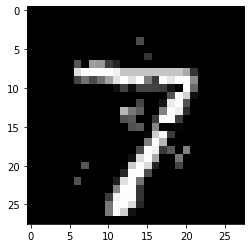

0.9417907
0.94480306
0.9482248
0.957413
0.9616356
0.93757635
0.9590593
0.93505806
0.9272754
0.93644357
0.9281397
0.938704
0.9480306
0.9360473
0.9347746
0.9327275
0.956254
0.9272754
0.9435164
0.9272754
0.93688804
0.9272754
0.9272754
0.9272754
0.9272754
0.94467413
0.94670486
0.9393401
0.93337864
0.9715758
0.9497728
0.9484421
0.93385684
0.9577188
0.946237
0.9527636
0.9463388
0.933334
0.9522223
0.9272754
0.94551075
0.93504703
0.93030256
0.96369916
0.9528729
0.9442761
0.94985217
0.94323325
0.94649094
0.936164
0.9580566
0.9370423
0.9535648
0.9484542
0.9377382
0.936122
0.9272754
0.9542027
0.93408996
0.9452059
0.94647115
0.9453187
0.95064753
0.9272754
0.9272754
0.94662124
0.9413445
0.93897885
0.9272754
0.94185
0.93334883
0.94665736
0.9272754
0.9587469
0.94496346
0.948689
0.9510801
0.95442593
0.95072186
0.9575193
0.9388531
0.9272754
0.9500588
0.9638277
0.940228
0.9272754
0.9272754
0.9272754
0.9392577
0.9272754
0.9313511
0.95043975
0.9485618
0.95842457
0.9414233
0.9272754
0.9272754
0.9272754
0.9

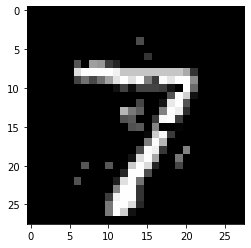

0.93970937
0.93356085
0.9580447
0.93784887
0.93886864
0.9585041
0.9618675
0.9401348
0.93066806
0.941318
0.9244814
0.93377554
0.9544892
0.94704056
0.95004255
0.93249804
0.9577717
0.9244814
0.94496113
0.94740117
0.9295806
0.9244814
0.95134896
0.9722311
0.9324726
0.95950615
0.94621015
0.94797
0.93175405
0.9514106
0.94629383
0.960492
0.9509454
0.9396787
0.9477579
0.940927
0.9244814
0.9244814
0.93369454
0.93527764
0.9355657
0.9679406
0.94104344
0.95069516
0.93339664
0.9352703
0.9244814
0.94268674
0.9244814
0.9434791
0.9546262
0.9244814
0.96383226
0.95676756
0.9475059
0.9312587
0.9244814
0.9393888
0.93459845
0.95102656
0.95823014
0.9244814
0.9303346
0.9462424
0.93868506
0.931021
0.9244814
0.94222736
0.9445954
0.9647451
0.9493809
0.93533665
0.94116855
0.93450475
0.9412827
0.9244814
0.94994
0.9456223
0.93936557
0.94278723
0.9520672
0.95779115
0.92728055
0.9502352
0.95359147
0.9244814
0.93786997
0.9390764
0.95093304
0.9387316
0.97337824
0.933329
0.95782804
0.939021
0.9400452
0.9296721
0.9461615

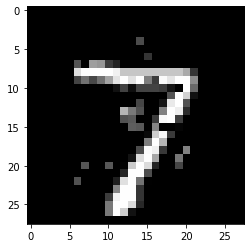

0.929742
0.9458713
0.9337388
0.95418197
0.96659684
0.9549013
0.9511328
0.9533836
0.93626714
0.94288653
0.9357848
0.9499266
0.96068233
0.9403387
0.94011307
0.97225654
0.9562784
0.956258
0.9380793
0.9226802
迭代: 6
置信度： 0.9226802


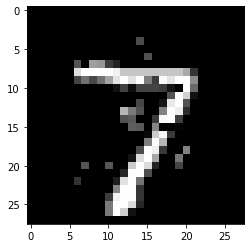

0.96317875
0.9226802
0.96012443
0.9405894
0.9594651
0.94757384
0.94221026
0.94597733
0.94325286
0.9330534
0.9499808
0.942029
0.9226802
0.93277913
0.9226802
0.9226802
0.93953174
0.9352163
0.9390409
0.9280209
0.9685486
0.9226802
0.93550354
0.9378931
0.9359715
0.9226802
0.9471044
0.92250925
迭代: 7
置信度： 0.92250925


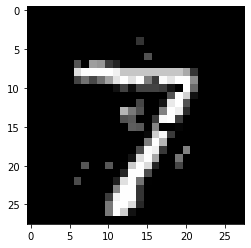

0.92884046
0.92250925
0.92250925
0.9530996
0.9417461
0.9724329
0.92250925
0.92250925
0.9320256
0.93375826
0.9520422
0.92250925
0.9558935
0.95609933
0.93056077
0.92250925
0.9310373
0.92250925
0.93447465
0.95521843
0.92872477
0.92250925
0.92250925
0.9586635
0.92250925
0.9637397
0.9298147
0.9524288
0.92530525
0.9431863
0.92250925
0.92250925
0.92784137
0.935955
0.9227553
0.9318078
0.93168193
0.92697865
0.94018656
0.9408517
0.93065876
0.944397
0.93773943
0.94549114
0.94003665
0.9225285
0.97210115
0.93504786
0.9303168
0.94043577
0.9250246
0.94272435
0.927275
0.92250925
0.9281828
0.9366095
0.94400364
0.93201834
0.93457377
0.93508005
0.95262325
0.93873507
0.92250925
0.9482371
0.9448612
0.9426193
0.93423843
0.9407701
0.9403007
0.93321145
0.92250925
0.92250925
0.94183683
0.92250925
0.9560671
0.9401555
0.92250925
0.92250925
0.9481877
0.92250925
0.94016826
0.93332297
0.94256604
0.94820786
0.9502747
0.94850224
0.94217014
0.93543243
0.937029
0.93130773
0.95767975
0.92250925
0.9237393
0.937188
0.9376

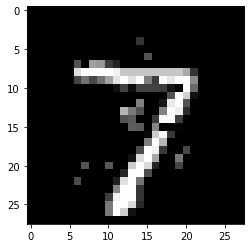

0.9578294
0.92579967
0.9407993
0.9208394
0.934935
0.9208394
0.9527245
0.96007574
0.9208394
0.9208394
0.93780786
0.9260513
0.94838387
0.9614276
0.95743906
0.94324344
0.9208394
0.9404369
0.955474
0.95054865
0.92860305
0.9378359
0.92996365
0.9371018
0.9208394
0.9378911
0.94644713
0.9406975
0.9471429
0.9550335
0.94114244
0.95114285
0.9554046
0.93493676
0.9378588
0.9385077
0.93280584
0.94960237
0.93591636
0.94402045
0.93830496
0.9492134
0.9208394
0.9438856
0.9422569
0.93544954
0.93058604
0.9320661
0.9360654
0.93762904
0.93119925
0.95164394
0.9208394
0.946127
0.9208394
0.95807517
0.9208394
0.9208394
0.9669083
0.9322476
0.95209473
0.93934184
0.97579974
0.925855
0.93314284
0.9261692
0.9208394
0.9208394
0.95374936
0.9253836
0.9607565
0.95087856
0.9606389
0.93005365
0.9208394
0.95619196
0.96045995
0.9229732
0.96027005
0.9329992
0.9418532
0.9319644
0.9208394
0.9469221
0.96579206
0.9304621
0.9288209
0.9208394
0.94843745
0.9421074
0.9301902
0.92753273
0.92736405
0.9730718
0.94934005
0.9450693
0.949

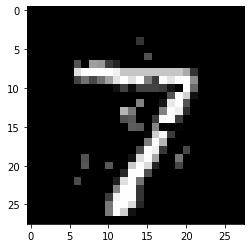

0.94505644
0.9430236
0.9570795
0.9575829
0.92061096
0.92061096
0.9434859
0.9275054
0.9231749
0.9408963
0.9306901
0.9264362
0.92061096
0.93270016
0.9322543
0.92061096
0.9518401
0.9493838
0.9512115
0.9337615
0.9287115
0.94634676
0.92611897
0.96043813
0.92716163
0.972303
0.9630095
0.92061096
0.92061096
0.94771177
0.92756915
0.9295805
0.92061096
0.93387014
0.9501279
0.9544988
0.9311519
0.9311632
0.93902224
0.9330678
0.9471489
0.9399451
0.92061096
0.92061096
0.9429509
0.9445136
0.9352245
0.9460141
0.9228816
0.92649
0.9606662
0.94938356
0.92963797
0.92556065
0.9329947
0.9574905
0.93135846
0.93359804
0.9377912
0.94365853
0.9447183
0.949345
0.9502803
0.9397399
0.93304735
0.92621326
0.95087415
0.92922485
0.9405878
0.9207986
0.9364615
0.9467241
0.94692713
0.9313467
0.9308017
0.92061096
0.92061096
0.92061096
0.9299489
0.92061096
0.92061096
0.95153695
0.9357202
0.9552138
0.93046904
0.94522285
0.9300187
0.94527656
0.93397
0.93411505
0.958536
0.9474164
0.94876605
0.94245243
0.938733
0.9199785
迭代: 10

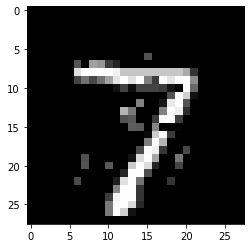

0.9356046
0.9273251
0.948767
0.9262584
0.9284571
0.9384095
0.9199785
0.9443253
0.9448162
0.9291015
0.9199785
0.95102894
0.9222446
0.9412508
0.92622954
0.9199785
0.93486726
0.9199785
0.96094203
0.9463806
0.9199785
0.9257479
0.9199785
0.929225
0.9576744
0.93628323
0.92929846
0.95308095
0.92413276
0.9343343
0.9199785
0.9334308
0.9397599
0.9438496
0.9199785
0.95435643
0.96071017
0.9453198
0.9199785
0.94260675
0.94386256
0.9271358
0.93303925
0.9466392
0.9499964
0.93380195
0.9464775
0.9487313
0.93707603
0.9482433
0.92720264
0.9259587
0.92789286
0.93517786
0.96796966
0.9367305
0.94433784
0.9329311
0.92798626
0.93683606
0.9456238
0.93030125
0.9418672
0.9354711
0.9199785
0.9479657
0.92340755
0.9541353
0.95140356
0.953492
0.9199785
0.9300444
0.9369585
0.93865377
0.9450249
0.9199785
0.9199785
0.9199785
0.93045014
0.9530089
0.93861777
0.934197
0.9441132
0.9567356
0.92260176
0.9199785
0.93309385
0.9381555
0.9486627
0.9320262
0.9420204
0.9433299
0.93750155
0.9279935
0.9199785
0.93702966
0.94999826
0

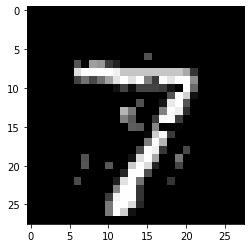

0.9192036
0.9192036
0.9481093
0.9402229
0.953752
0.9330814
0.9305073
0.95168585
0.9267645
0.9308181
0.9586601
0.926777
0.9192036
0.9192036
0.94854194
0.9619459
0.9322977
0.9397993
0.92249054
0.92675364
0.95330733
0.9450188
0.94762045
0.9290358
0.9254861
0.93250895
0.9192036
0.9192036
0.92676747
0.9507185
0.965859
0.9488124
0.93064255
0.9192036
0.95276934
0.9192036
0.9389141
0.942455
0.9192036
0.94918174
0.9405255
0.9192036
0.95513755
0.9388765
0.939787
0.9361349
0.93477476
0.92451316
0.9376159
0.93323857
0.95577264
0.9287085
0.9485898
0.96260613
0.9192036
0.93433344
0.9407179
0.9534292
0.95943284
0.94687074
0.9628694
0.93919575
0.9547025
0.9293115
0.92883563
0.9192036
0.93816847
0.9302746
0.91767716
迭代: 12
置信度： 0.91767716


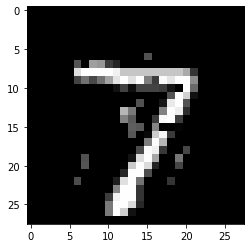

0.92731816
0.9622378
0.96143085
0.94543356
0.9249588
0.9284503
0.9473775
0.95528895
0.96214056
0.96877474
0.9276727
0.93819606
0.9656004
0.9414077
0.95309156
0.9694586
0.91767716
0.91767716
0.91767716
0.91767716
0.9526361
0.91767716
0.93269724
0.91767716
0.9299114
0.91767716
0.9332209
0.94420403
0.94009125
0.9473338
0.9303429
0.939946
0.94732356
0.94300133
0.91767716
0.94190013
0.9427447
0.92832744
0.94965625
0.9498864
0.91767716
0.9277454
0.9379983
0.92985535
0.91767716
0.9472615
0.9292689
0.91767716
0.91767716
0.9560324
0.9282467
0.91767716
0.9308593
0.93761134
0.91767716
0.9326824
0.9337352
0.93332124
0.9293098
0.93108916
0.92925644
0.91767716
0.9586573
0.9232246
0.9519039
0.91767716
0.942978
0.93430436
0.94731504
0.94644266
0.9445917
0.92968094
0.93682194
0.950663
0.91767716
0.92488277
0.94569844
0.93929577
0.9261011
0.9251167
0.91767716
0.96226823
0.91767716
0.91767716
0.95481235
0.93548757
0.954759
0.95773363
0.95631874
0.9299146
0.9214412
0.9451422
0.93144816
0.920105
0.91767716

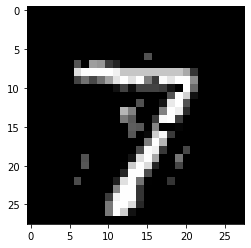

0.957382
0.9292087
0.92257863
0.9306798
0.9409079
0.94252384
0.94768286
0.93711394
0.9170836
0.93447405
0.95502007
0.94136924
0.95242274
0.9458936
0.9579842
0.92379385
0.9170836
0.92756456
0.9315284
0.9170836
0.92463404
0.9258813
0.92875934
0.93283653
0.9254749
0.9527134
0.93323743
0.93826646
0.94036555
0.9397584
0.931582
0.9418715
0.9237615
0.9208908
0.9271797
0.9405633
0.93861586
0.9324563
0.94018793
0.9275751
0.9315227
0.9170836
0.9373646
0.93373644
0.9500457
0.9170836
0.930054
0.94331706
0.9170836
0.9273684
0.92673695
0.9430769
0.93727285
0.9520713
0.9473825
0.93761355
0.9279401
0.95660883
0.924867
0.9346221
0.9170836
0.9320041
0.93269193
0.9420035
0.9426674
0.9275135
0.9170836
0.92767596
0.95487475
0.9170836
0.9252849
0.92456585
0.9170836
0.94131154
0.9170836
0.92337996
0.95135134
0.9170836
0.9275976
0.9172538
0.95586663
0.94784874
0.9493046
0.9170836
0.9494602
0.9170836
0.92692673
0.9285618
0.9170836
0.9258669
0.935758
0.939772
0.9458042
0.9170836
0.921427
0.9170836
0.9170836
0.9

0.9457106
0.948199
0.9296789
0.9294222
0.94619584
0.940277
0.93332
0.9170836
0.94649935
0.93720907
0.93847597
0.92909867
0.9311984
0.9445855
0.93882954
0.95306855
0.9415498
0.9408271
0.93094
0.9354562
0.94922435
0.9634448
0.9170836
0.9582866
0.92360824
0.9356662
0.93337315
0.9287845
0.9170836
0.93512666
0.9323453
0.9170836
0.9170836
0.9459282
0.9516816
0.93677205
0.93012434
0.9302173
0.9341882
0.9170836
0.93423736
0.9283854
0.93561363
0.9300372
0.922106
0.9170836
0.9264368
0.9490632
0.9219811
0.9430005
0.9170836
0.92889065
0.9170836
0.92154586
0.9170836
0.96121675
0.94162315
0.9531988
0.92756456
0.92747676
0.9380532
0.9386547
0.9531803
0.92087513
0.9325684
0.9241204
0.9305843
0.9309307
0.93686616
0.9328718
0.9170836
0.9488099
0.9424985
0.95112914
0.96094126
0.9170836
0.9300108
0.93333286
0.9435354
0.93611294
0.93501556
0.9319054
0.9307042
0.9488047
0.9276531
0.9394592
0.9711524
0.94644713
0.9170836
0.9170836
0.94131565
0.9750862
0.93677515
0.9170836
0.9170836
0.93724597
0.94846696
0.93

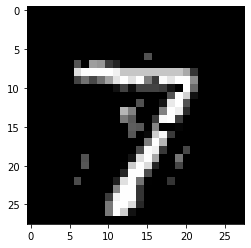

最终置信度： 0.9170836
[1.0917357e-03 6.2731974e-04 1.3562247e-02 5.5572618e-02 1.2783289e-04
 4.5512049e-03 1.5292773e-05 9.1708362e-01 3.2408752e-03 4.1272836e-03]


In [25]:
# 再次改变坐标减小置信度2
x_T = copy.deepcopy(x_F2)
count = 0
for t in range(30):
    x_f1 = copy.deepcopy(x_T)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  f_y >= 1.00000000e+00 or f_i >= 1.00000000e+00:
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_T):
            x_T = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_T))
            f1 = x_T+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_T)
    if con == 1000:
        print("迭代失败")
        break
f = x_T+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])